In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
pd.options.display.max_rows = 2000
pd.options.display.max_columns = 150

In [3]:
disease = pd.read_csv("Data/Disease Dataset.csv",index_col=False)

In [4]:
disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [5]:
disease.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [6]:
disease = disease.rename(columns={"prognosis": "diagnosis"}, errors="raise")

In [7]:
#Phantom column at 133 exists
disease.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'diagnosis',
       'Unnamed: 133'],
      dtype='object', length=134)

In [8]:
disease.shape

(4920, 134)

In [9]:
#no missing values except for column #133
disease.isnull().sum()

itching                              0
skin_rash                            0
nodal_skin_eruptions                 0
continuous_sneezing                  0
shivering                            0
chills                               0
joint_pain                           0
stomach_pain                         0
acidity                              0
ulcers_on_tongue                     0
muscle_wasting                       0
vomiting                             0
burning_micturition                  0
spotting_ urination                  0
fatigue                              0
weight_gain                          0
anxiety                              0
cold_hands_and_feets                 0
mood_swings                          0
weight_loss                          0
restlessness                         0
lethargy                             0
patches_in_throat                    0
irregular_sugar_level                0
cough                                0
high_fever               

In [10]:
disease.sum()

itching                                                                         678
skin_rash                                                                       786
nodal_skin_eruptions                                                            108
continuous_sneezing                                                             222
shivering                                                                       108
chills                                                                          798
joint_pain                                                                      684
stomach_pain                                                                    222
acidity                                                                         222
ulcers_on_tongue                                                                108
muscle_wasting                                                                  108
vomiting                                                                    

In [11]:
disease.isnull().sum() / len(disease.index)

itching                           0.0
skin_rash                         0.0
nodal_skin_eruptions              0.0
continuous_sneezing               0.0
shivering                         0.0
chills                            0.0
joint_pain                        0.0
stomach_pain                      0.0
acidity                           0.0
ulcers_on_tongue                  0.0
muscle_wasting                    0.0
vomiting                          0.0
burning_micturition               0.0
spotting_ urination               0.0
fatigue                           0.0
weight_gain                       0.0
anxiety                           0.0
cold_hands_and_feets              0.0
mood_swings                       0.0
weight_loss                       0.0
restlessness                      0.0
lethargy                          0.0
patches_in_throat                 0.0
irregular_sugar_level             0.0
cough                             0.0
high_fever                        0.0
sunken_eyes 

In [12]:
#drop phantom column 133
disease.dropna(how='all', axis='columns')

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,diagnosis
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [13]:
#unnamed column still appears
disease.isnull().sum() / len(disease.index)

itching                           0.0
skin_rash                         0.0
nodal_skin_eruptions              0.0
continuous_sneezing               0.0
shivering                         0.0
chills                            0.0
joint_pain                        0.0
stomach_pain                      0.0
acidity                           0.0
ulcers_on_tongue                  0.0
muscle_wasting                    0.0
vomiting                          0.0
burning_micturition               0.0
spotting_ urination               0.0
fatigue                           0.0
weight_gain                       0.0
anxiety                           0.0
cold_hands_and_feets              0.0
mood_swings                       0.0
weight_loss                       0.0
restlessness                      0.0
lethargy                          0.0
patches_in_throat                 0.0
irregular_sugar_level             0.0
cough                             0.0
high_fever                        0.0
sunken_eyes 

In [14]:
#found this solution to rename with dict, then drop
disease.rename({"Unnamed: 133":"a"}, axis="columns", inplace=True)
disease.drop(["a"], axis=1, inplace=True)

In [15]:
#finally gone
disease.isnull().sum() / len(disease.index)

itching                           0.0
skin_rash                         0.0
nodal_skin_eruptions              0.0
continuous_sneezing               0.0
shivering                         0.0
chills                            0.0
joint_pain                        0.0
stomach_pain                      0.0
acidity                           0.0
ulcers_on_tongue                  0.0
muscle_wasting                    0.0
vomiting                          0.0
burning_micturition               0.0
spotting_ urination               0.0
fatigue                           0.0
weight_gain                       0.0
anxiety                           0.0
cold_hands_and_feets              0.0
mood_swings                       0.0
weight_loss                       0.0
restlessness                      0.0
lethargy                          0.0
patches_in_throat                 0.0
irregular_sugar_level             0.0
cough                             0.0
high_fever                        0.0
sunken_eyes 

In [16]:
disease.fluid_overload.value_counts()

0    4920
Name: fluid_overload, dtype: int64

In [17]:
disease['fluid_overload.1'].value_counts()

0    4806
1     114
Name: fluid_overload.1, dtype: int64

In [18]:
#drop fluid_overload and rename fluid_overload.1 to fluid_overload
disease = disease.drop(['fluid_overload'], axis = 1)
disease = disease.rename(columns={'fluid_overload.1': 'fluid_overload'}, errors="raise")

In [19]:
disease.diagnosis.value_counts()

Heart attack                               120
Hypothyroidism                             120
Jaundice                                   120
Psoriasis                                  120
Drug Reaction                              120
Hepatitis E                                120
Impetigo                                   120
Chicken pox                                120
Hypoglycemia                               120
Tuberculosis                               120
Allergy                                    120
(vertigo) Paroymsal  Positional Vertigo    120
AIDS                                       120
Alcoholic hepatitis                        120
hepatitis A                                120
Cervical spondylosis                       120
Arthritis                                  120
Paralysis (brain hemorrhage)               120
Hyperthyroidism                            120
Hepatitis B                                120
Peptic ulcer diseae                        120
Diabetes     

In [20]:
#copy values of diagnosis to new column triage
disease['triage'] = disease['diagnosis'].values

In [21]:
disease.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,diagnosis,triage
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,Fungal infection


In [22]:
#map triage categories from diagnosis to triage column

#triage category can be changed using the dictionary

#1 Immediate Care Need
#2 Care Needed within a week
#3 Address at next visit
#4 Need more information for triage

disease = disease.replace({'triage': {'Paralysis (brain hemorrhage)':1,'Pneumonia':1,'Bronchial Asthma':1,'Tuberculosis':1,
                            'Typhoid':1, 'Chicken pox':1,'Heart attack':1,'Drug Reaction':1, 'Malaria':1, 'Dengue':1,
                            'Fungal infection': 2,'Hepatitis E':2,'Alcoholic hepatitis':2, 'Hepatitis B':2,'Hepatitis C':2,
                            'hepatitis A':2, 'Urinary tract infection':2, 'AIDS':2,'Allergy':4,'Psoriasis':3,'Acne':3,
                           'Arthritis':3,'(vertigo) Paroymsal  Positional Vertigo':3,'Dimorphic hemmorhoids(piles)':3,
                           'Osteoarthristis':3,'GERD':3,'Migraine':3,'Hyperthyroidism':3,'Varicose veins':3,'Hepatitis D':1,
                           'Common Cold':4,'Impetigo':4,'Hypertension ':4,'Cervical spondylosis':4,'Diabetes ':4,
                            'Gastroenteritis':4,'Jaundice':4,'Chronic cholestasis':4,'Peptic ulcer diseae':4,'Hypoglycemia':4,
                                      'Hypothyroidism':3}})

In [23]:
#confirm all triage changes have been made
disease.triage.value_counts()

3    1320
1    1320
4    1320
2     960
Name: triage, dtype: int64

In [24]:
disease.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,diagnosis,triage
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2


In [25]:
disease.shape

(4920, 133)

In [26]:
#table of all diagnoses for report
df_freq = pd.crosstab(disease['diagnosis'], columns='count')
df_freq

col_0,count
diagnosis,
(vertigo) Paroymsal Positional Vertigo,120
AIDS,120
Acne,120
Alcoholic hepatitis,120
Allergy,120
Arthritis,120
Bronchial Asthma,120
Cervical spondylosis,120
Chicken pox,120


In [27]:
#table of all symptoms for report
disease.iloc[:,:131].sum()

itching                            678
skin_rash                          786
nodal_skin_eruptions               108
continuous_sneezing                222
shivering                          108
chills                             798
joint_pain                         684
stomach_pain                       222
acidity                            222
ulcers_on_tongue                   108
muscle_wasting                     108
vomiting                          1914
burning_micturition                216
spotting_ urination                108
fatigue                           1932
weight_gain                        114
anxiety                            114
cold_hands_and_feets               114
mood_swings                        228
weight_loss                        456
restlessness                       228
lethargy                           456
patches_in_throat                  108
irregular_sugar_level              114
cough                              564
high_fever               

# Triage System Model building

In [28]:
#Split data for decision tree
y = disease['triage']
X = disease.drop(['triage','diagnosis'], axis =1)

In [29]:
#split data intro train, test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

treemodel = DecisionTreeClassifier()

In [31]:
treemodel.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [32]:
predicted_train = treemodel.predict(X_train)
accuracy_score(y_train, predicted_train)

1.0

In [33]:
y_pred = treemodel.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       268
           2       1.00      1.00      1.00       216
           3       1.00      1.00      1.00       258
           4       1.00      1.00      1.00       242

    accuracy                           1.00       984
   macro avg       1.00      1.00      1.00       984
weighted avg       1.00      1.00      1.00       984



Data Leakage is likely, we need to clean the dataset to remove interrelated features

Not clear if any particular features are causing the data leakage. I will implent cramers test to assess relatedness of symptoms

In [39]:
from scipy.stats import chi2_contingency

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [40]:
rows= []

for var1 in disease:
  col = []
  for var2 in disease :
    cramers =cramers_V(disease[var1], disease[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = disease.columns, index =disease.columns)
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

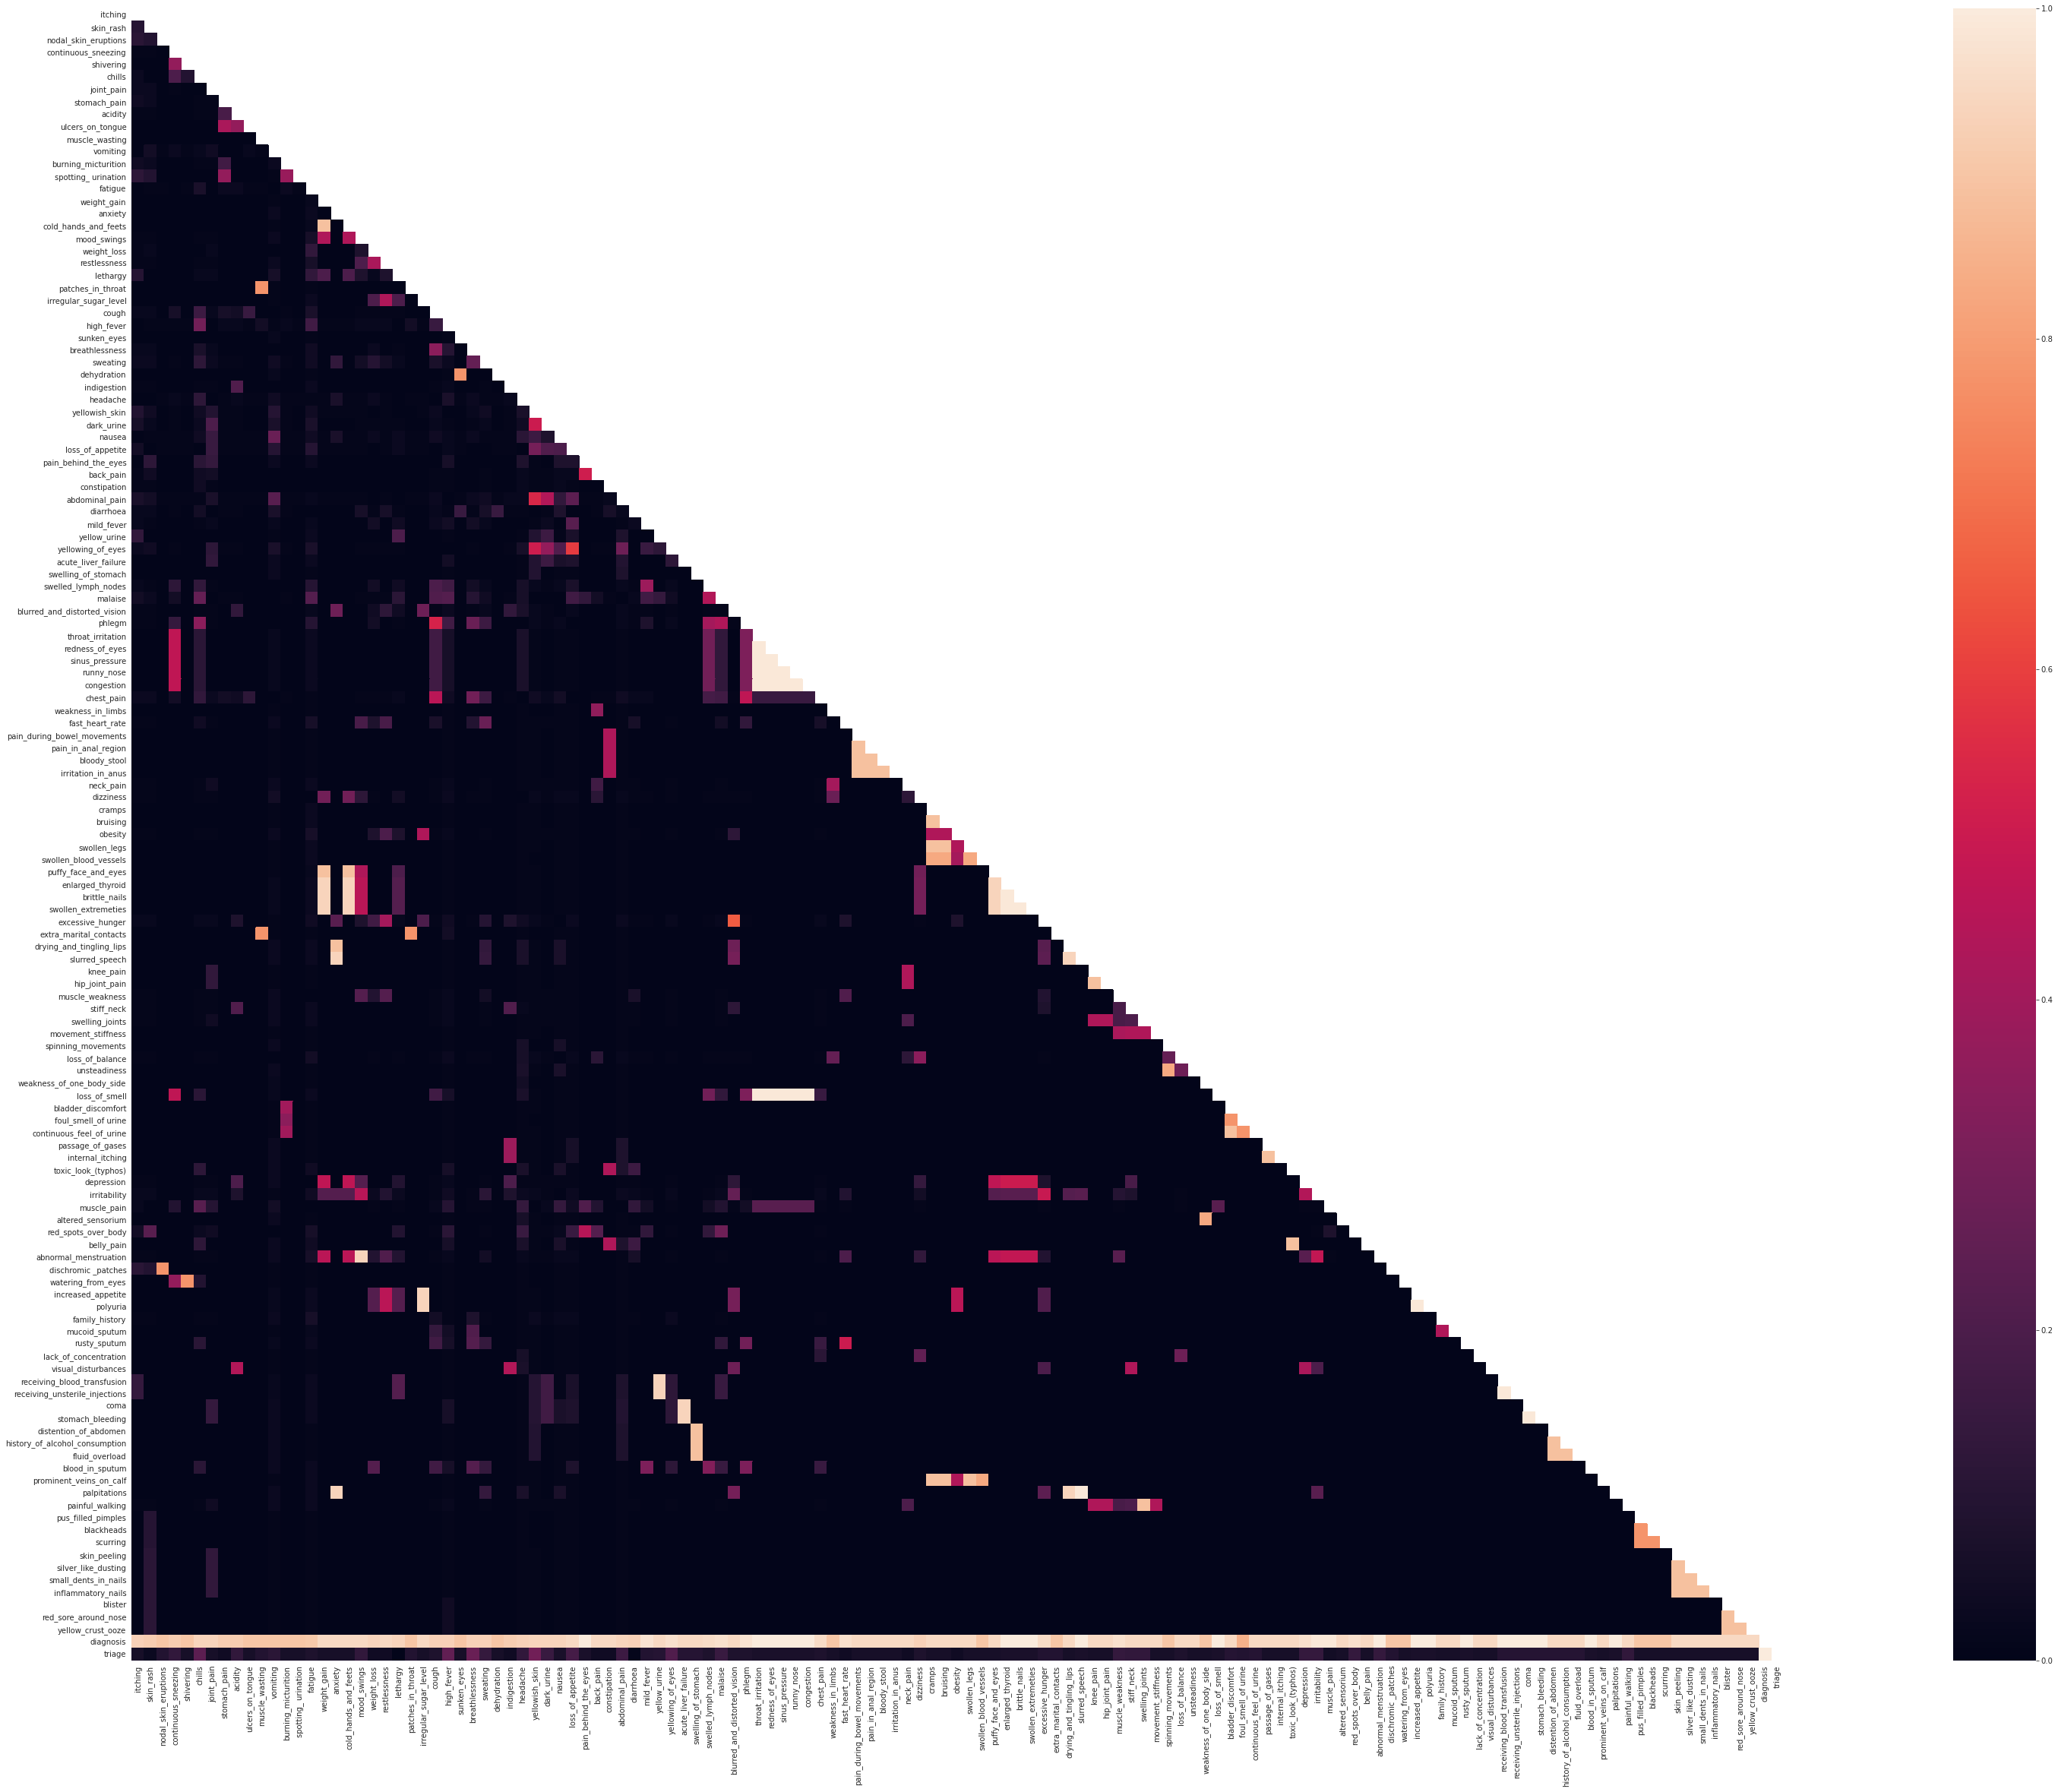

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(80,40))

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True, xticklabels =True, yticklabels =True)

plt.show()

In [42]:
# We will drop features that have a cramers score higher than ~.4
disease_clean = disease.drop(['weight_gain','anxiety','cold_hands_and_feets','yellow_urine','acute_liver_failure',
                        'loss_of_smell','fluid_overload','swelling_of_stomach','redness_of_eyes','sinus_pressure',
                       'runny_nose','congestion','prominent_veins_on_calf','brittle_nails','swollen_extremeties',
                       'high_fever','breathlessness','loss_of_appetite','yellowish_skin','vomiting','yellowing_of_eyes',
                       'itching','abdominal_pain','chills','sweating','headache','dark_urine','nausea','weight_loss',
                       'dizziness','muscle_pain','malaise','joint_pain','mild_fever','red_spots_over_body','palpitations',
                       'irregular_sugar_level','abnormal_menstruation','swelling_joints','coma','increased_appetite',
                        'enlarged_thyroid','receiving_blood_transfusion','receiving_unsterile_injections','skin_peeling',
                       'blister','pain_in_anal_region','drying_and_tingling_lips','toxic_look_(typhos)','excessive_hunger',
                       'cramps','bruising','irritation_in_anus','bloody_stool','swollen_blood_vessels','spinning_movements',
                       'movement_stiffness','yellow_crust_ooze','distention_of_abdomen','small_dents_in_nails','scurring',
                        'visual_disturbances','extra_marital_contacts','inflammatory_nails','hip_joint_pain','altered_sensorium',
                       'continuous_feel_of_urine','internal_itching','dischromic _patches','shivering','muscle_wasting',
                       'blackheads','sunken_eyes','bladder_discomfort','cough','phlegm','swelled_lymph_nodes','ulcers_on_tongue',
                       'acidity','painful_walking','obesity','constipation', 'throat_irritation','back_pain','mood_swings',
                        'restlessness','fast_heart_rate','depression','rusty_sputum','neck_pain','spotting_ urination',
                       'mucoid_sputum','watering_from_eyes','passage_of_gases'],axis = 1)

In [43]:
disease_clean.head()

,skin_rash,nodal_skin_eruptions,continuous_sneezing,stomach_pain,burning_micturition,fatigue,lethargy,patches_in_throat,dehydration,indigestion,pain_behind_the_eyes,diarrhoea,blurred_and_distorted_vision,chest_pain,weakness_in_limbs,pain_during_bowel_movements,swollen_legs,puffy_face_and_eyes,slurred_speech,knee_pain,muscle_weakness,stiff_neck,loss_of_balance,unsteadiness,weakness_of_one_body_side,foul_smell_of urine,irritability,belly_pain,polyuria,family_history,lack_of_concentration,stomach_bleeding,history_of_alcohol_consumption,blood_in_sputum,pus_filled_pimples,silver_like_dusting,red_sore_around_nose,diagnosis,triage
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2


In [44]:
rows= []

for var1 in disease_clean:
  col = []
  for var2 in disease_clean:
    cramers =cramers_V(disease_clean[var1], disease_clean[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
clean_heatmap = pd.DataFrame(cramers_results, columns = disease_clean.columns, index =disease_clean.columns)
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

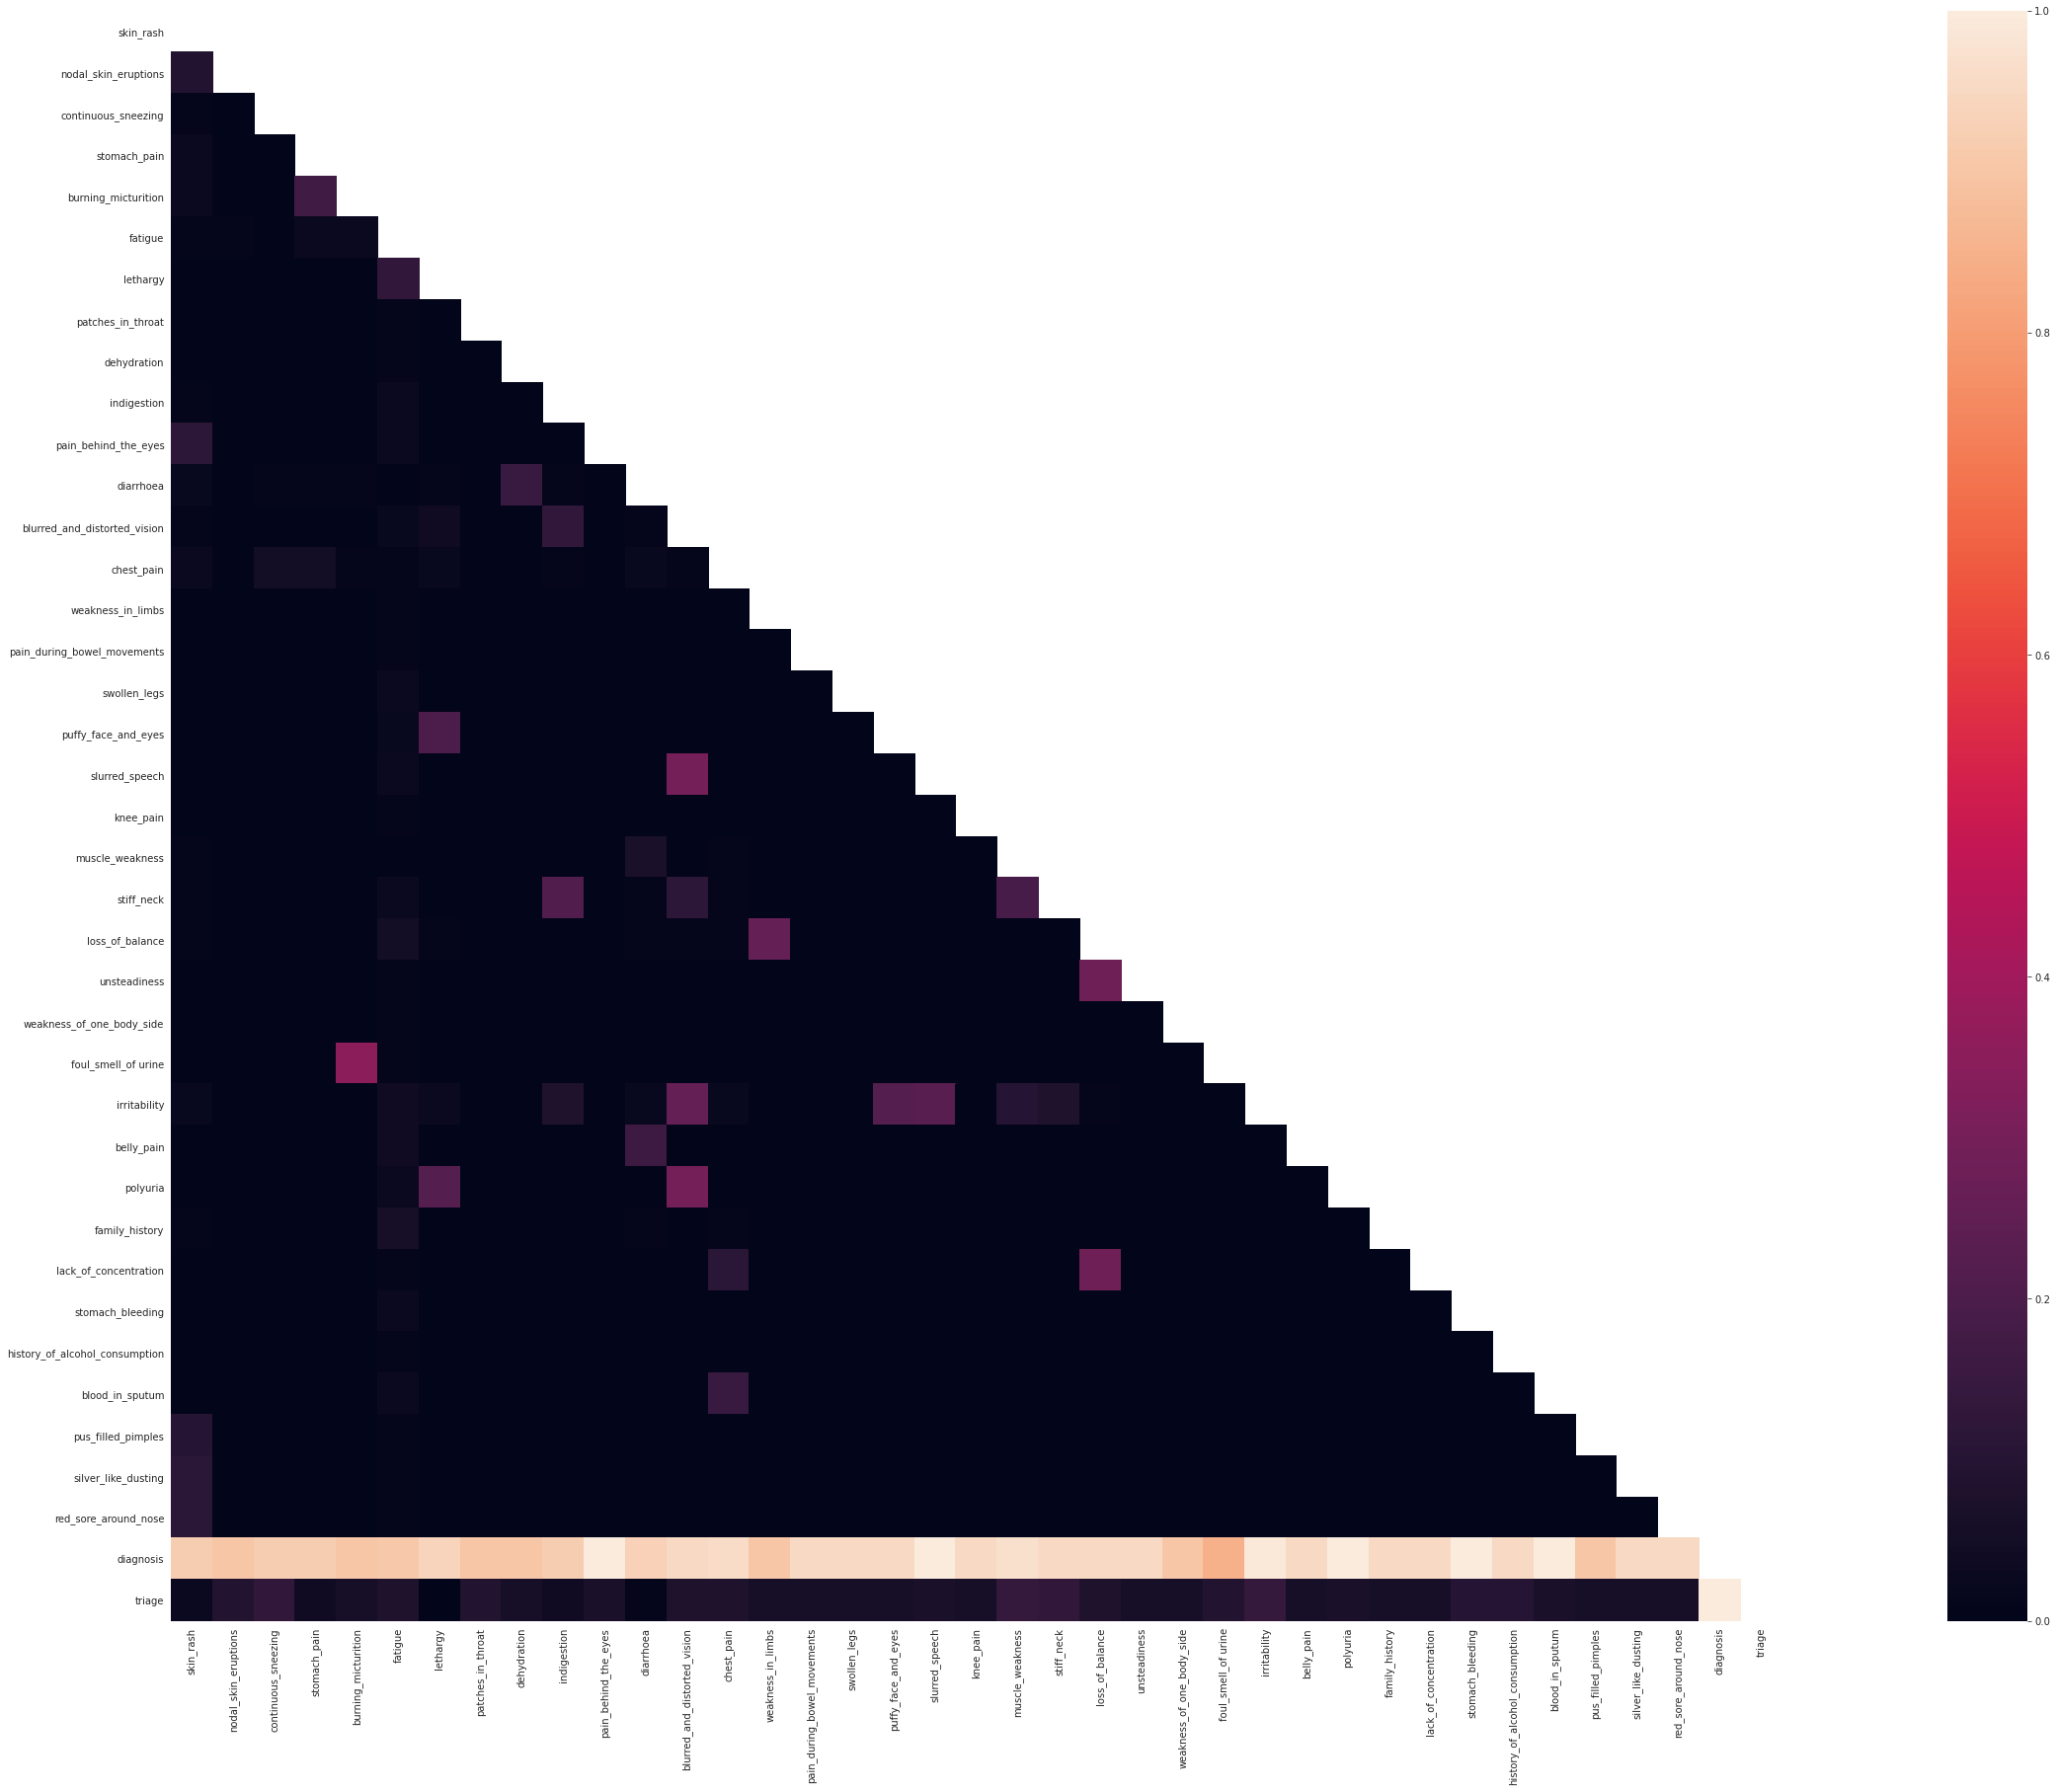

In [45]:
plt.figure(figsize=(60,30))

mask = np.zeros_like(clean_heatmap, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = sns.heatmap(clean_heatmap, mask=mask,vmin=0., vmax=1, square=True, xticklabels =True, yticklabels =True)
plt.show()

In [46]:
disease_example1 = disease.drop(['triage', 'diagnosis'],axis = 1)

In [47]:
# prior heatmap for report
rows= []

for var1 in disease_example1:
  col = []
  for var2 in disease_example1:
    cramers =cramers_V(disease_example1[var1], disease_example1[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
prior_heatmap = pd.DataFrame(cramers_results, columns = disease_example1.columns, index =disease_example1.columns)
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

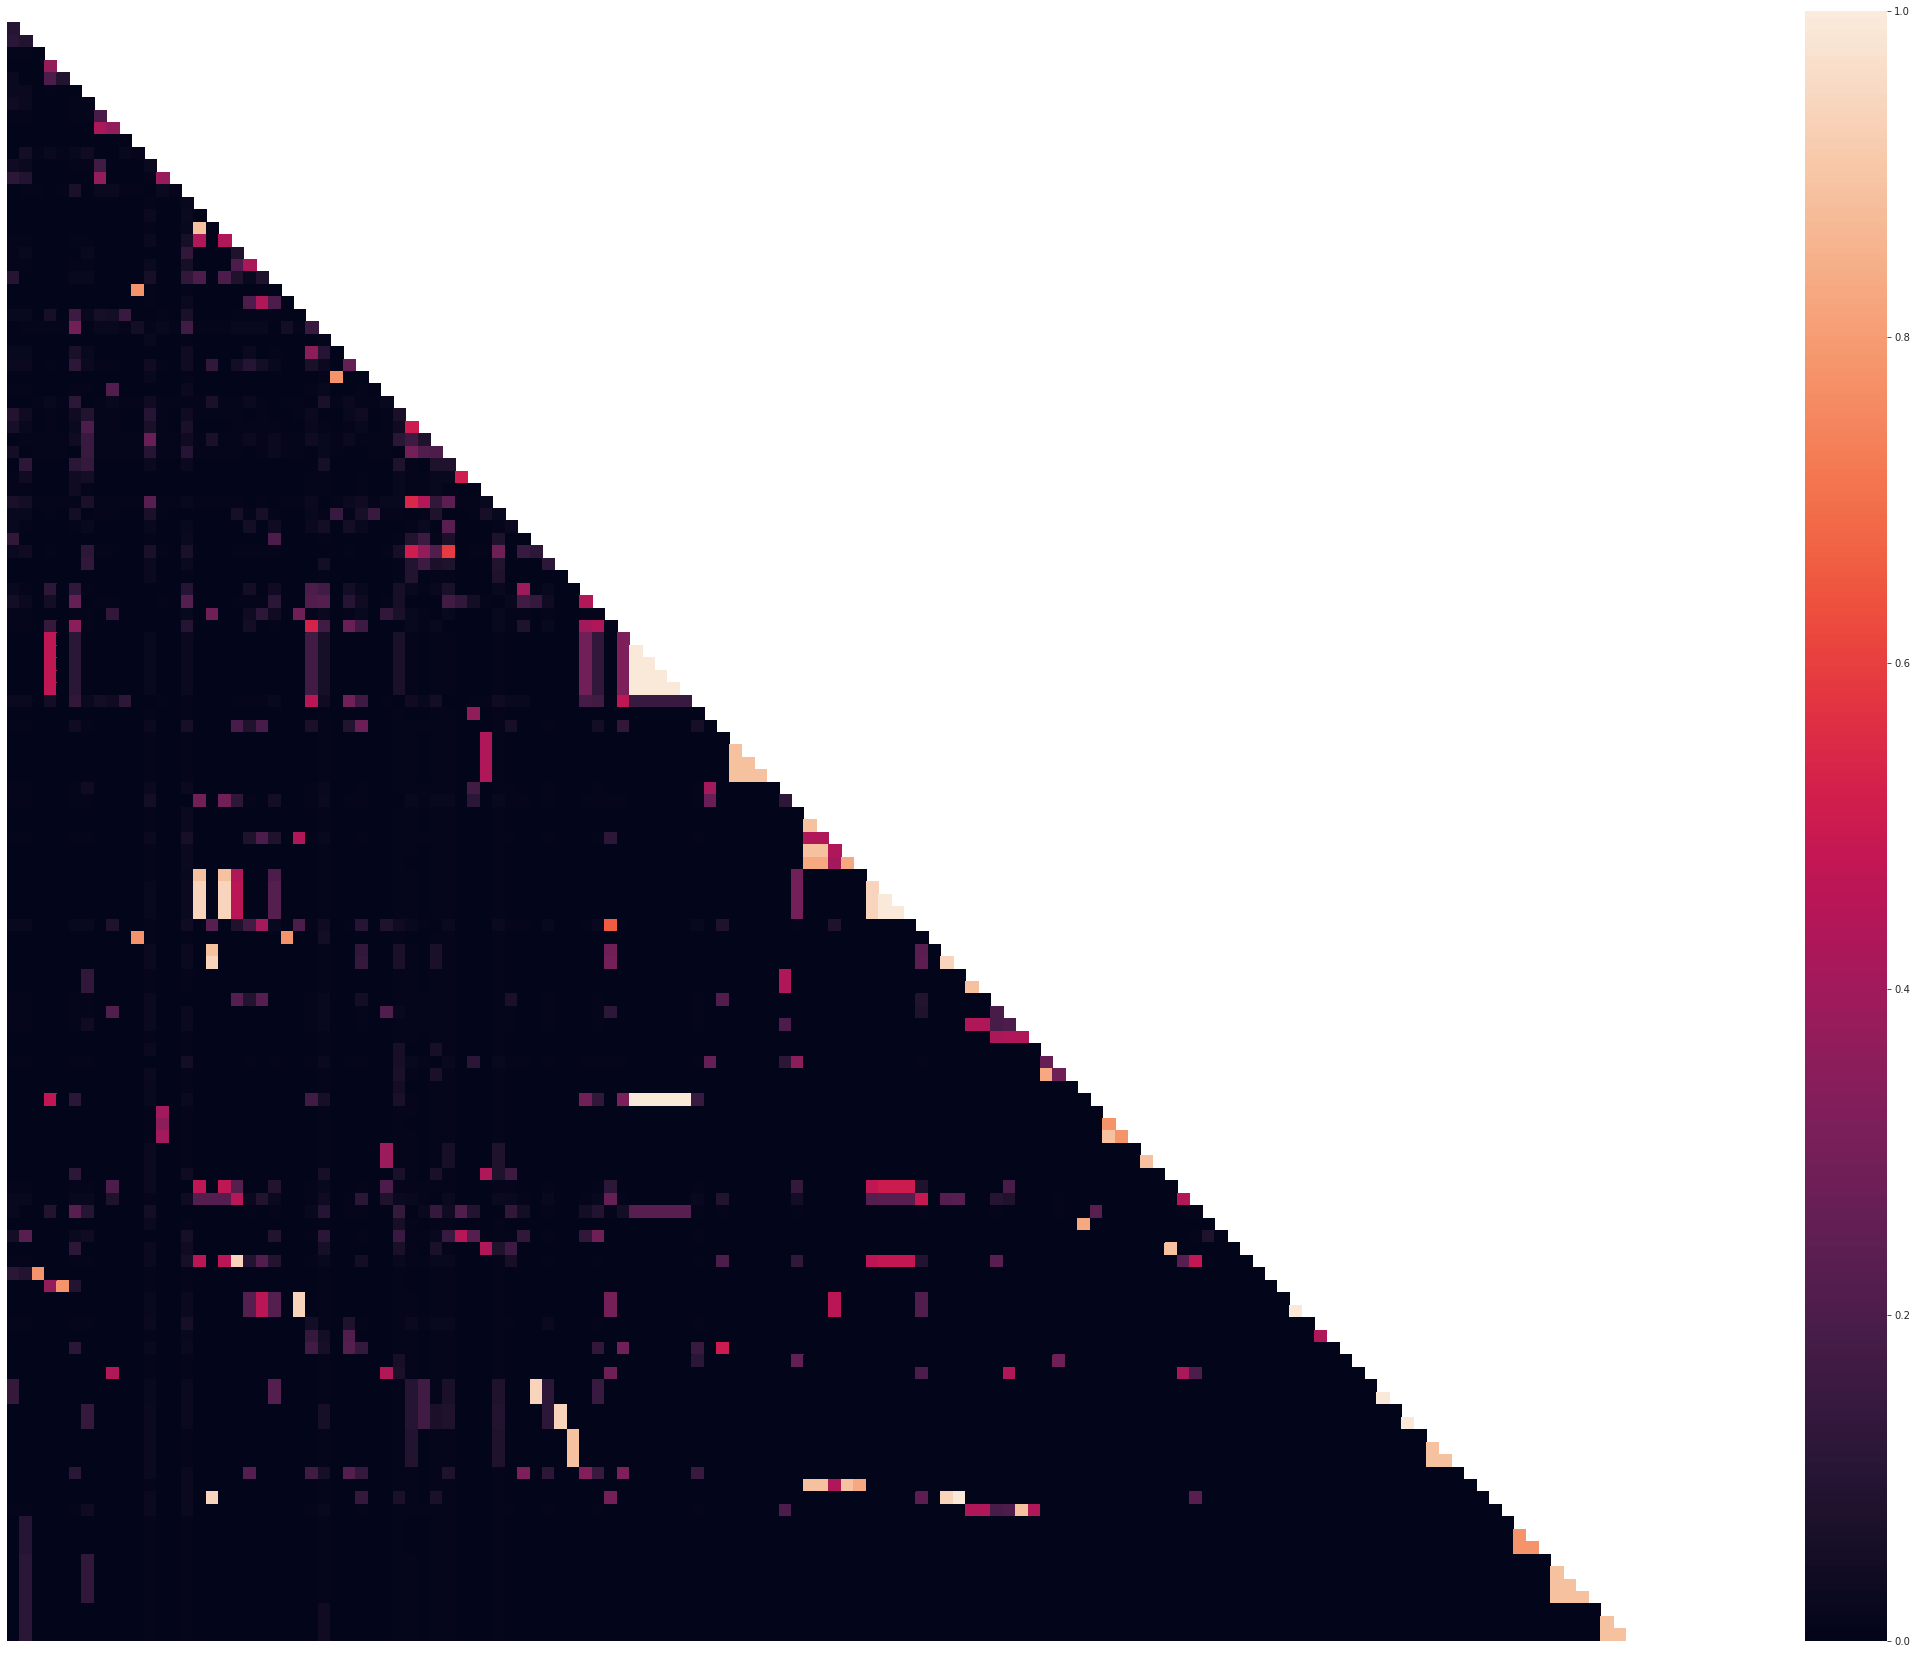

In [48]:
plt.figure(figsize=(60,30))

mask = np.zeros_like(prior_heatmap, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = sns.heatmap(prior_heatmap, mask=mask,vmin=0., vmax=1, square=True, xticklabels =False, yticklabels =False)
plt.show()

In [49]:
disease_example2 = disease.drop(['weight_gain','cold_hands_and_feets','triage', 'diagnosis'],axis = 1)

In [50]:
# example heatmap for report
rows= []

for var1 in disease_example2:
  col = []
  for var2 in disease_example2 :
    cramers =cramers_V(disease_example2[var1], disease_example2[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
remove_cluster_heatmap = pd.DataFrame(cramers_results, columns = disease_example2.columns, index =disease_example2.columns)
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

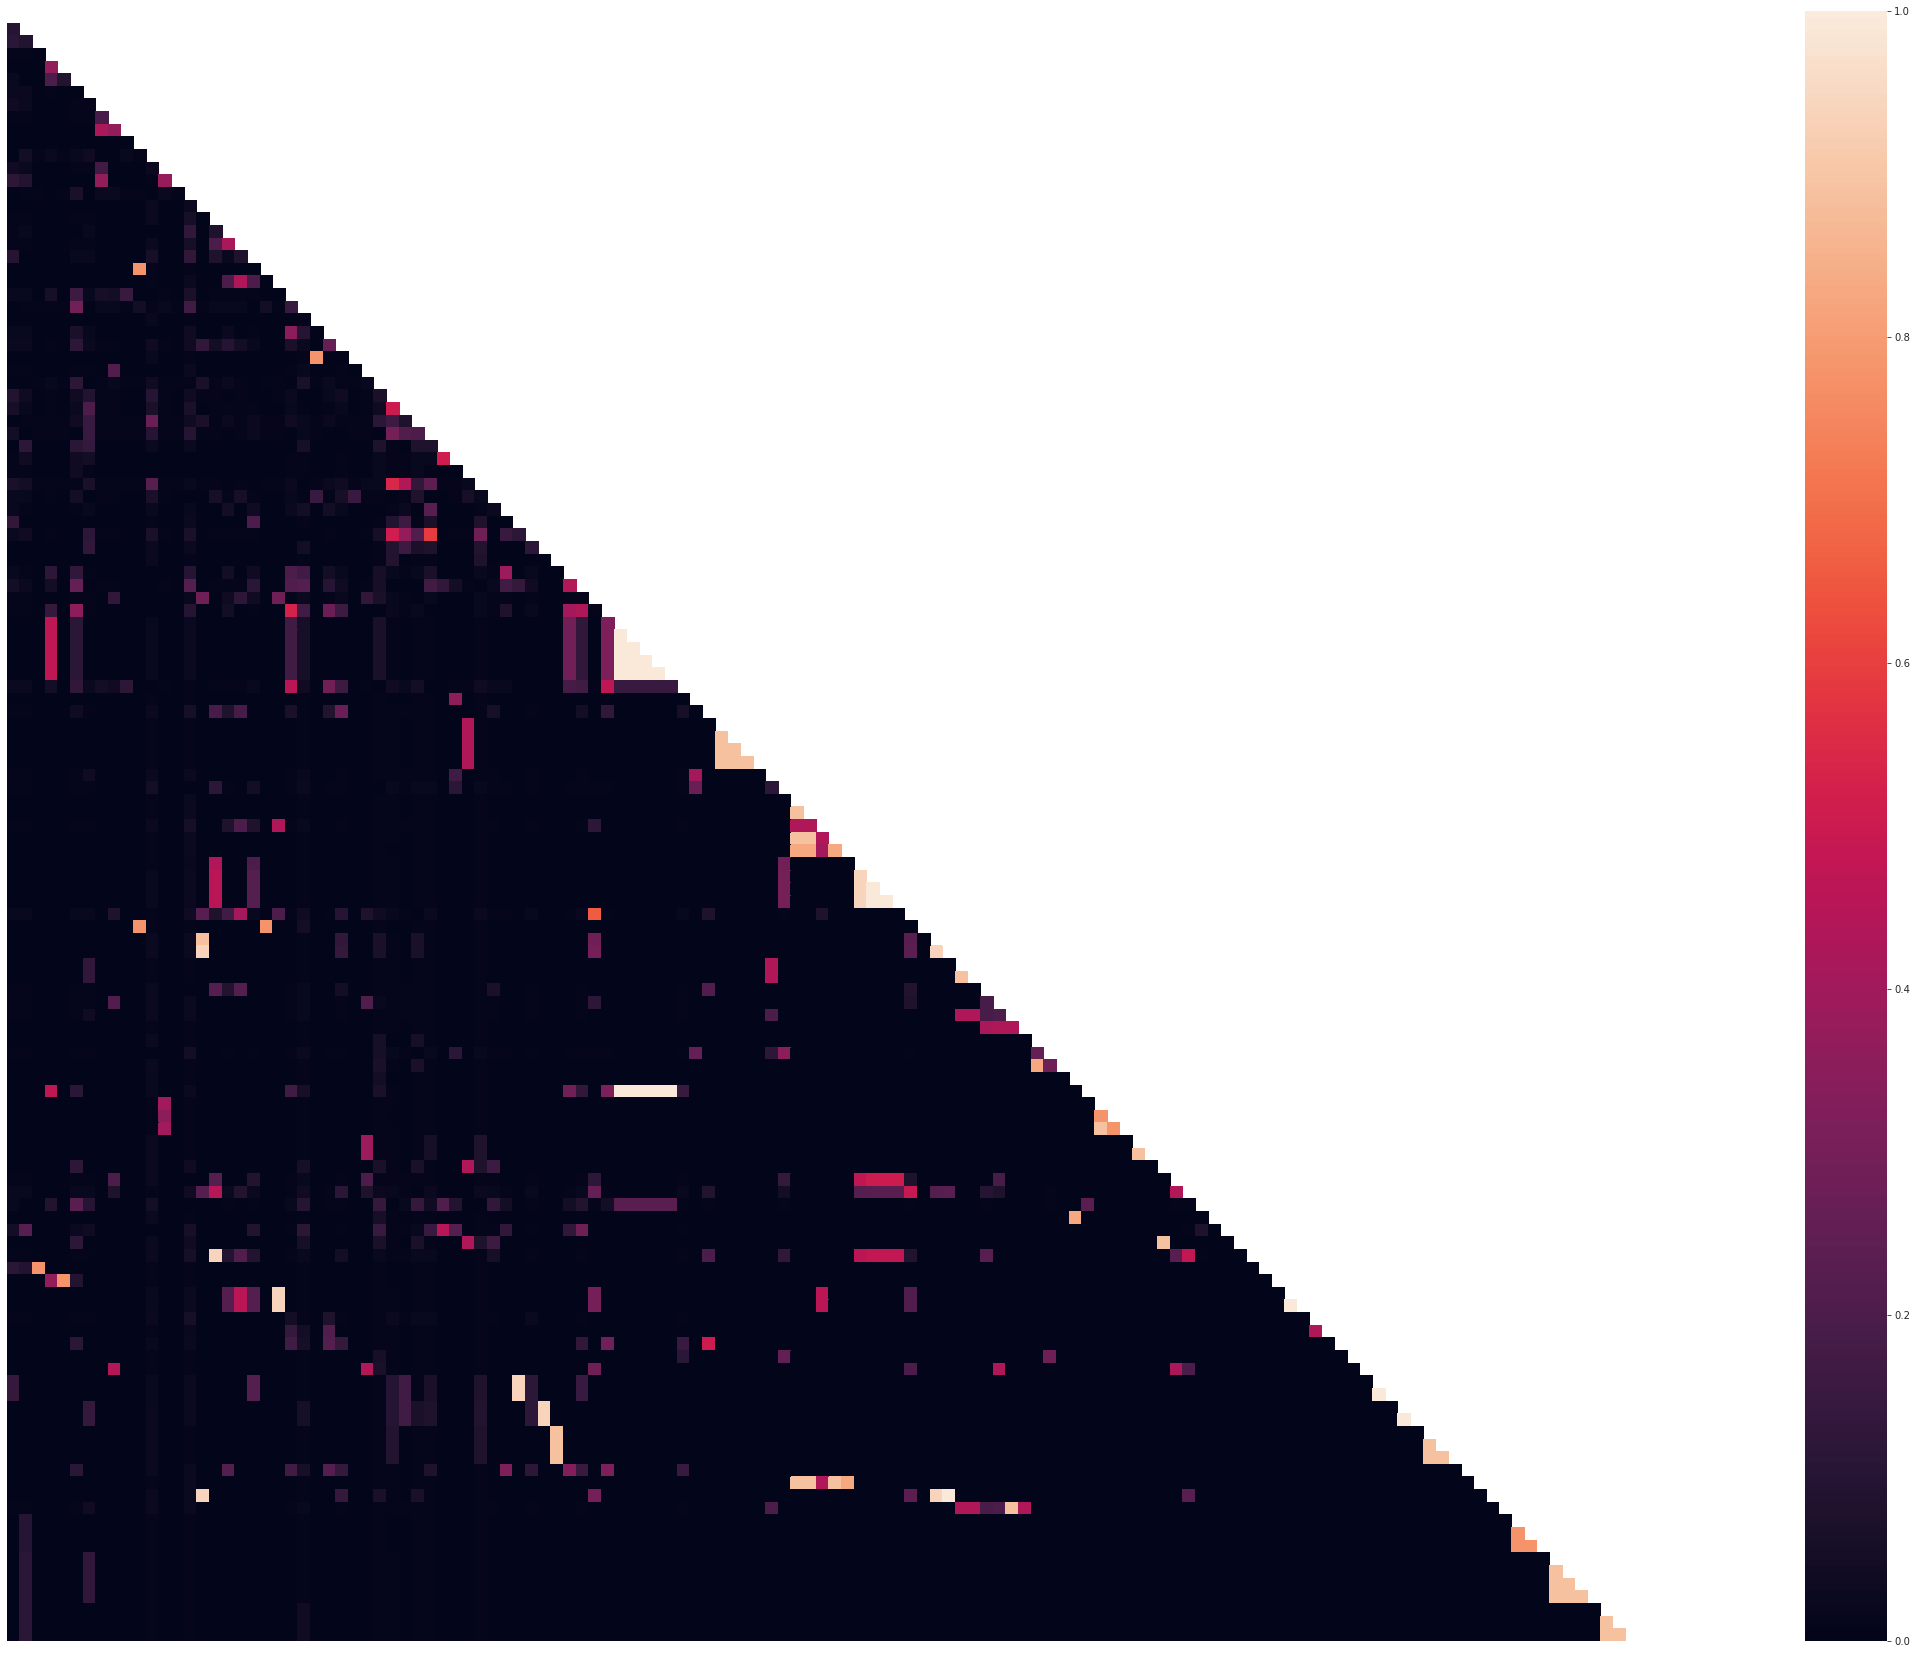

In [51]:
plt.figure(figsize=(60,30))

mask = np.zeros_like(remove_cluster_heatmap, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = sns.heatmap(remove_cluster_heatmap, mask=mask,vmin=0., vmax=1, square=True, xticklabels =False, yticklabels =False)
plt.show()

In [52]:
disease_example3 = disease.drop(['weight_gain','anxiety','cold_hands_and_feets','yellow_urine','acute_liver_failure',
                        'loss_of_smell','fluid_overload','swelling_of_stomach','redness_of_eyes','sinus_pressure',
                       'runny_nose','congestion','prominent_veins_on_calf','brittle_nails','swollen_extremeties',
                       'high_fever','breathlessness','loss_of_appetite','yellowish_skin','vomiting','yellowing_of_eyes',
                       'itching','abdominal_pain','chills','sweating','headache','dark_urine','nausea','weight_loss',
                       'dizziness','muscle_pain','malaise','joint_pain','mild_fever','red_spots_over_body','palpitations',
                       'irregular_sugar_level','abnormal_menstruation','swelling_joints','coma','increased_appetite',
                        'enlarged_thyroid','receiving_blood_transfusion','receiving_unsterile_injections','skin_peeling',
                       'blister','pain_in_anal_region','drying_and_tingling_lips','toxic_look_(typhos)','excessive_hunger',
                       'cramps','bruising','irritation_in_anus','bloody_stool','swollen_blood_vessels','spinning_movements',
                       'movement_stiffness','yellow_crust_ooze','distention_of_abdomen','small_dents_in_nails','scurring',
                        'visual_disturbances','extra_marital_contacts','inflammatory_nails','hip_joint_pain','altered_sensorium',
                       'continuous_feel_of_urine','internal_itching','dischromic _patches','shivering','muscle_wasting',
                       'blackheads','sunken_eyes','bladder_discomfort','cough','phlegm','swelled_lymph_nodes','ulcers_on_tongue',
                       'acidity','painful_walking','obesity','constipation', 'throat_irritation','back_pain','mood_swings',
                        'restlessness','fast_heart_rate','depression','rusty_sputum','neck_pain','spotting_ urination',
                       'mucoid_sputum','watering_from_eyes','passage_of_gases','triage', 'diagnosis'],axis = 1)                     

In [53]:
# final heatmap for report
rows= []

for var1 in disease_example3:
  col = []
  for var2 in disease_example3:
    cramers =cramers_V(disease_example3[var1], disease_example3[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
after_heatmap = pd.DataFrame(cramers_results, columns = disease_example3.columns, index =disease_example3.columns)
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

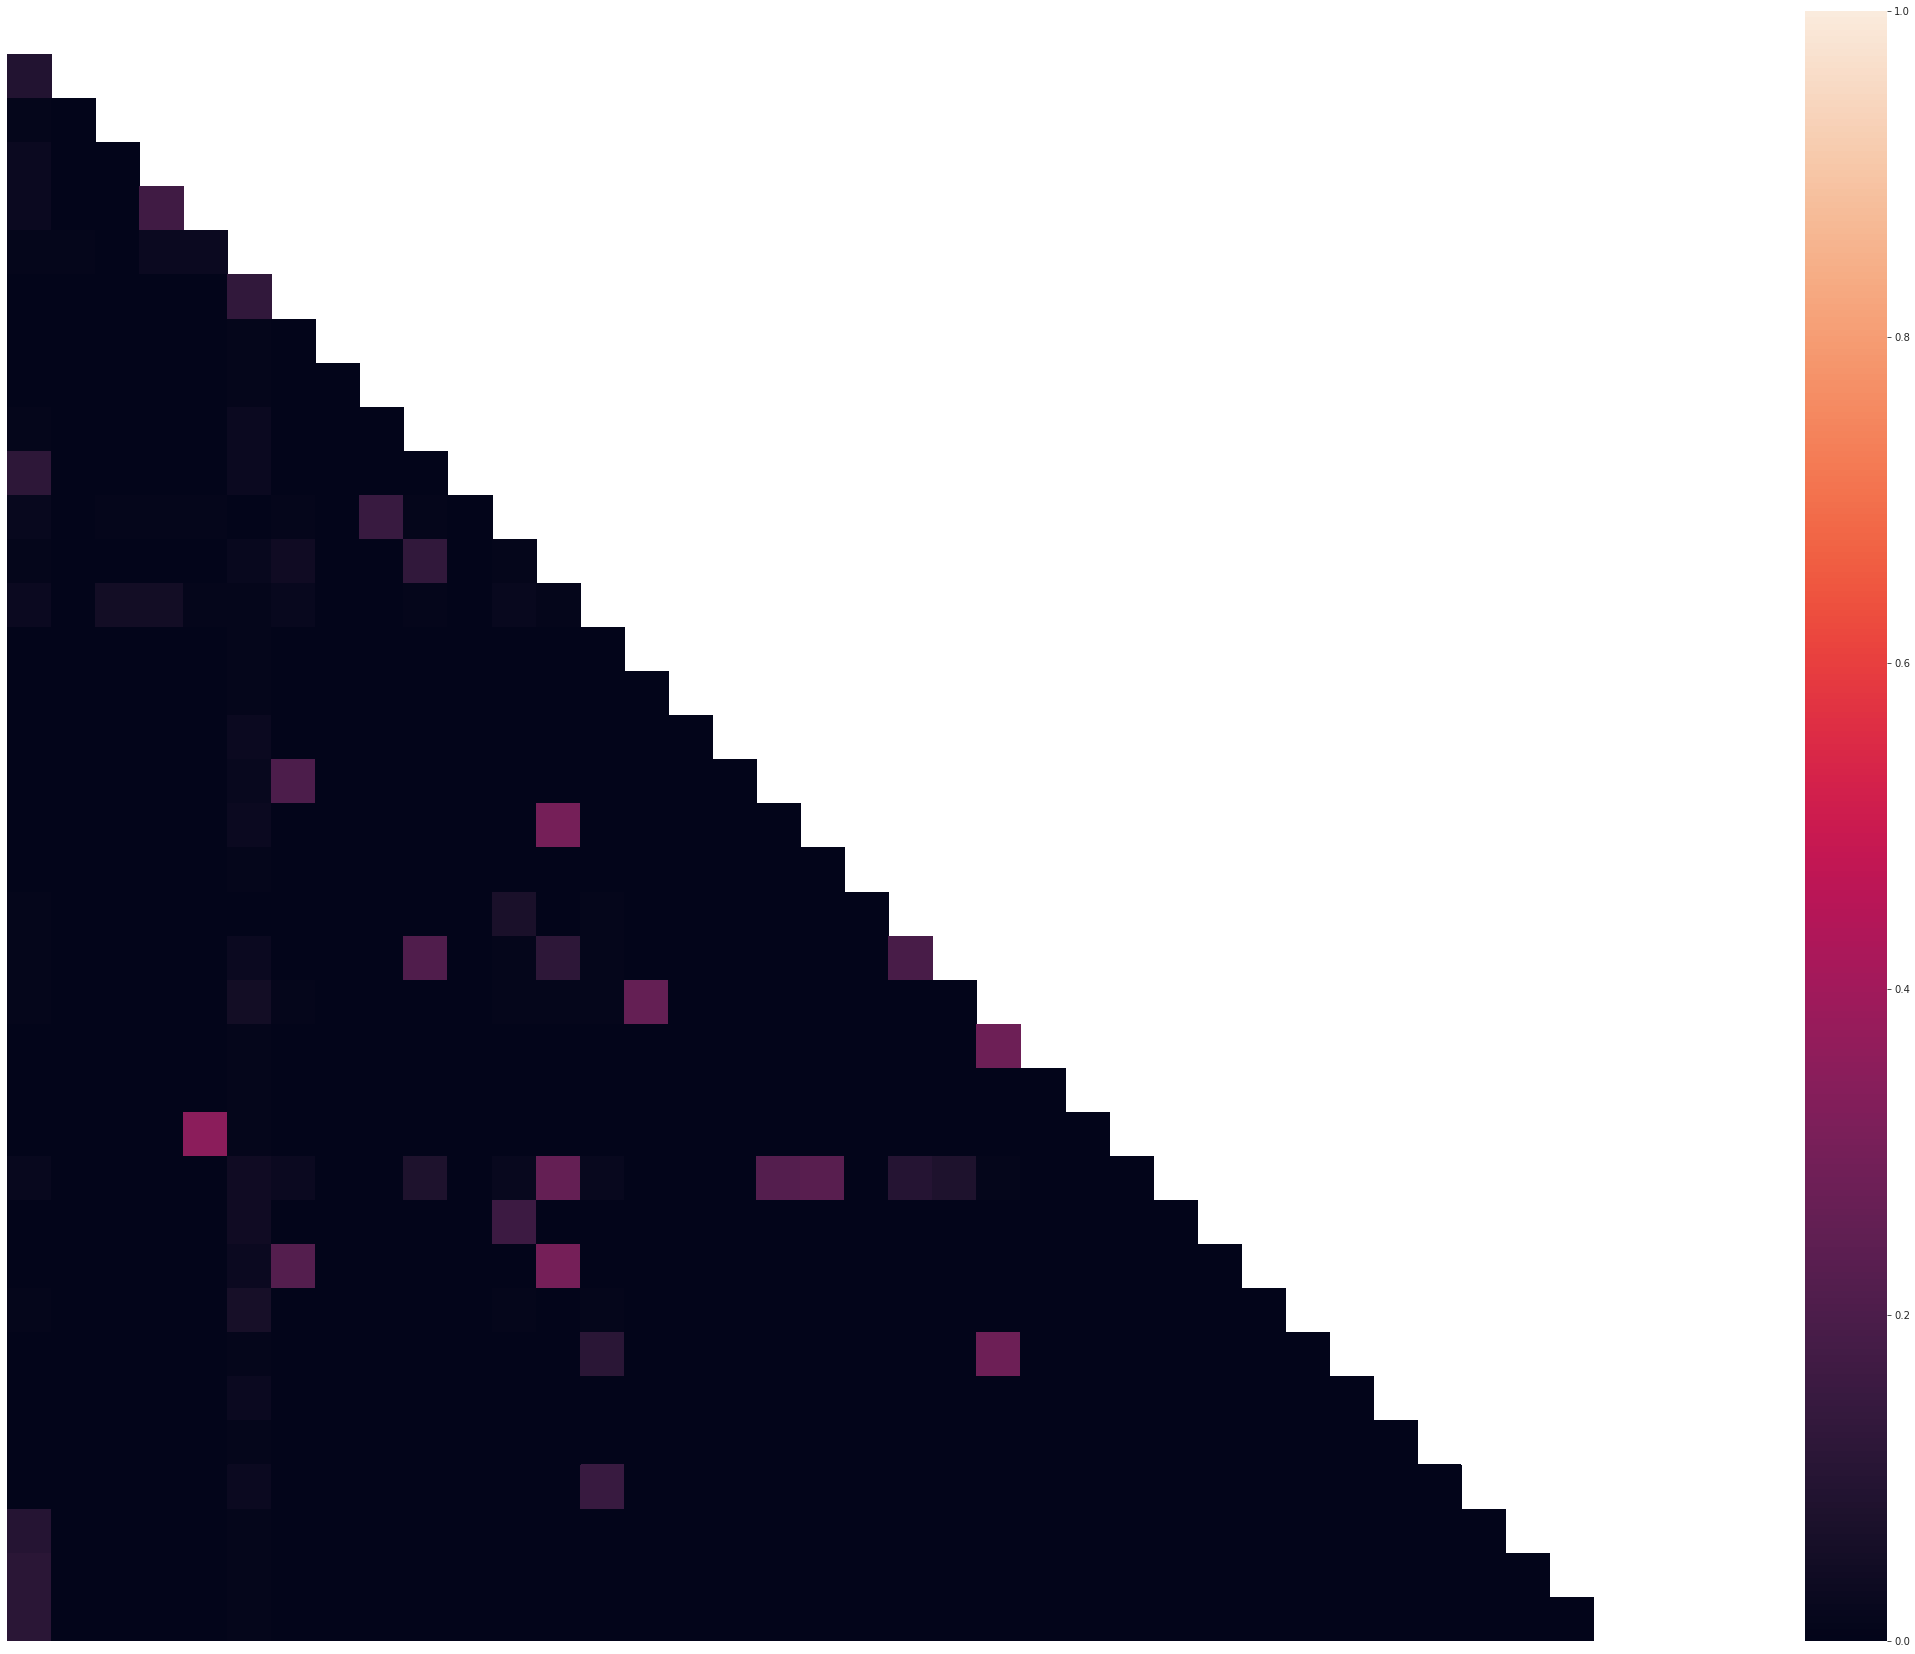

In [54]:
plt.figure(figsize=(60,30))

mask = np.zeros_like(after_heatmap, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = sns.heatmap(after_heatmap, mask=mask,vmin=0., vmax=1, square=True, xticklabels =False, yticklabels =False)
plt.show()

In [55]:
#major clusters of highly related features are gone
disease_clean

,skin_rash,nodal_skin_eruptions,continuous_sneezing,stomach_pain,burning_micturition,fatigue,lethargy,patches_in_throat,dehydration,indigestion,pain_behind_the_eyes,diarrhoea,blurred_and_distorted_vision,chest_pain,weakness_in_limbs,pain_during_bowel_movements,swollen_legs,puffy_face_and_eyes,slurred_speech,knee_pain,muscle_weakness,stiff_neck,loss_of_balance,unsteadiness,weakness_of_one_body_side,foul_smell_of urine,irritability,belly_pain,polyuria,family_history,lack_of_concentration,stomach_bleeding,history_of_alcohol_consumption,blood_in_sputum,pus_filled_pimples,silver_like_dusting,red_sore_around_nose,diagnosis,triage
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,3
4916,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Acne,3
4917,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Urinary tract infection,2
4918,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Psoriasis,3


In [56]:
y = disease_clean['triage']
X = disease_clean.drop(['triage','diagnosis'], axis =1)

In [57]:
#split data intro train, test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [58]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

treemodel = DecisionTreeClassifier()

In [59]:
treemodel.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [60]:
predicted_train = treemodel.predict(X_train)
accuracy_score(y_train, predicted_train)

0.9057418699186992

In [61]:
y_pred = treemodel.predict(X_test)

In [62]:
accuracy_score(y_test, y_pred)

0.883130081300813

Confusion matrix, without normalization
[[209  25   0  34]
 [ 34 170   2  10]
 [  2   0 250   6]
 [  2   0   0 240]]
Normalized confusion matrix
[[0.77985075 0.09328358 0.         0.12686567]
 [0.15740741 0.78703704 0.00925926 0.0462963 ]
 [0.00775194 0.         0.96899225 0.02325581]
 [0.00826446 0.         0.         0.99173554]]


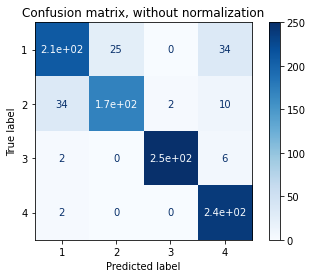

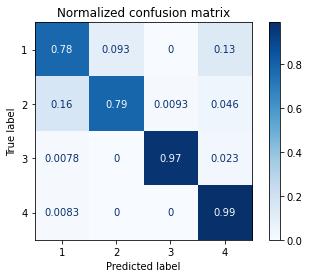

In [63]:
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(treemodel, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

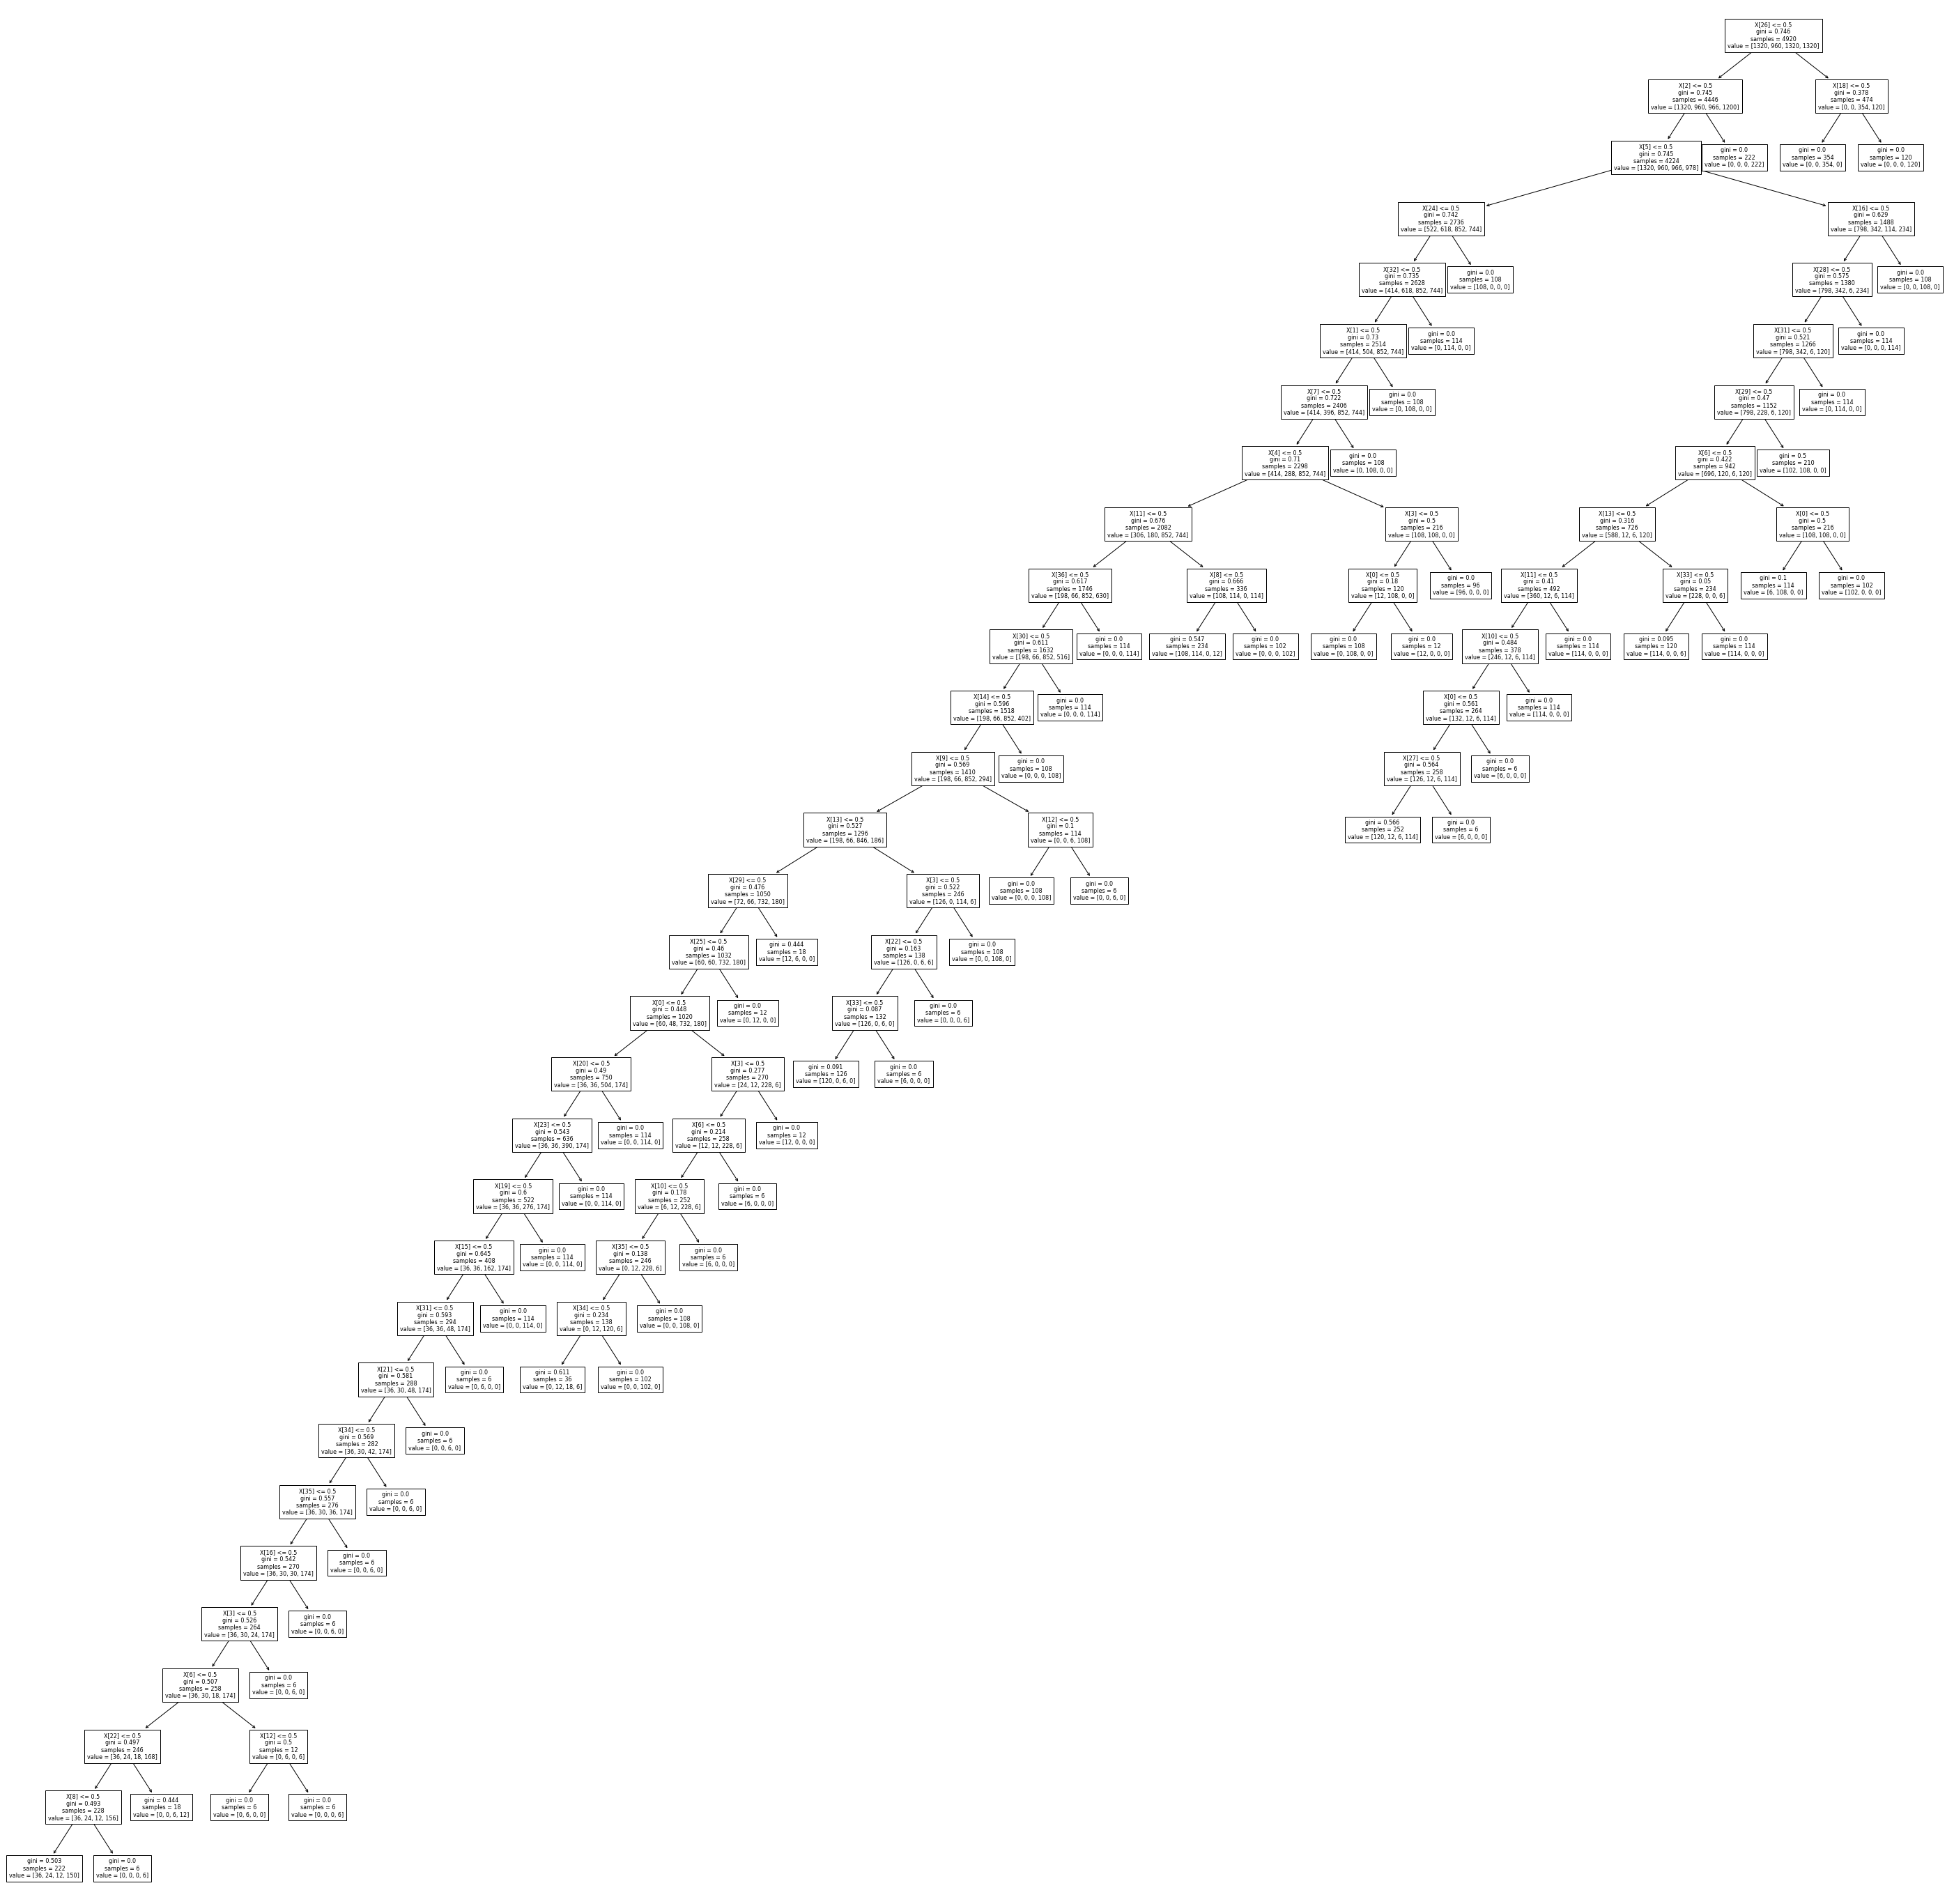

In [64]:
fig, ax = plt.subplots(figsize=(50, 50))
tree.plot_tree(treemodel.fit(X, y), fontsize=8)
plt.show()

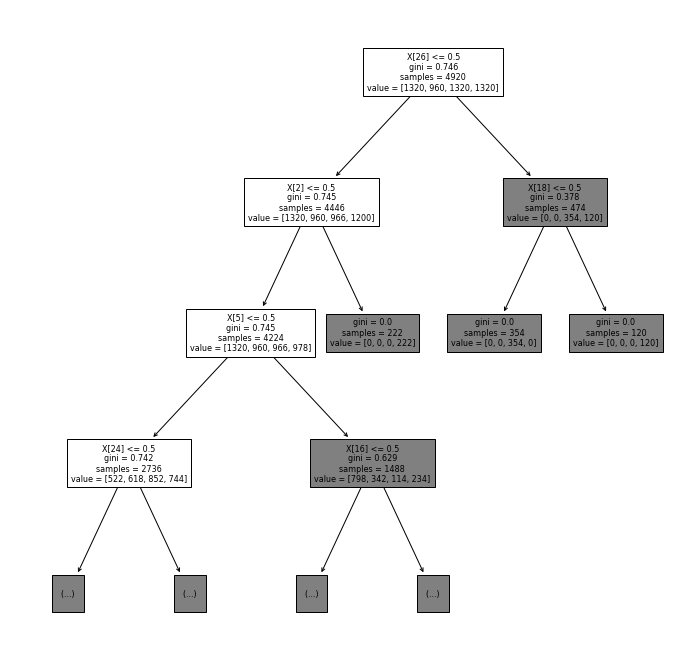

In [65]:
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(treemodel.fit(X, y), max_depth=3, fontsize=8)
plt.show()

In [66]:
n_nodes = treemodel.tree_.node_count
children_left = treemodel.tree_.children_left
children_right = treemodel.tree_.children_right
feature = treemodel.tree_.feature
threshold = treemodel.tree_.threshold
print(n_nodes)
print(children_left)
print(children_right)
print(feature)
print(threshold)

113
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  -1  -1  -1  34  -1  -1
  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  47  48  49  50  51  -1  -1  -1
  -1  -1  -1  -1  -1  60  61  62  -1  -1  -1  -1  67  -1  -1  -1  -1  -1
  73  -1  -1  76  77  -1  -1  -1  -1  -1  -1  -1  85  86  87  88  89  90
  91  92  93  94  -1  -1  -1  -1  -1 100  -1  -1 103  -1  -1  -1  -1  -1
  -1  -1 111  -1  -1]
[110 109  84  83  82  81  80  75  72  71  70  69  66  59  58  57  46  45
  44  43  42  41  40  39  38  37  36  33  32  31  -1  -1  -1  35  -1  -1
  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  56  55  54  53  52  -1  -1  -1
  -1  -1  -1  -1  -1  65  64  63  -1  -1  -1  -1  68  -1  -1  -1  -1  -1
  74  -1  -1  79  78  -1  -1  -1  -1  -1  -1  -1 108 107 106 105 102  99
  98  97  96  95  -1  -1  -1  -1  -1 101  -1  -1 104  -1  -1  -1  -1  -1
  -1  -1 112  -1  -1]
[26  2  5 24 32  7  1  4 11 30 36 14  9 13 29 25  0 19 15 23 20 31 21 16
  3

In [67]:
# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
print()

# First let's retrieve the decision path of each sample. The decision_path
# method allows to retrieve the node indicator functions. A non zero element of
# indicator matrix at the position (i, j) indicates that the sample i goes
# through the node j.

node_indicator = treemodel.decision_path(X_test)

# Similarly, we can also have the leaves ids reached by each sample.

leave_id = treemodel.apply(X_test)

# Now, it's possible to get the tests that were used to predict a sample or
# a group of samples. First, let's make it for the sample.

sample_id = 0
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]

print('Rules used to predict sample %s: ' % sample_id)
for node_id in node_index:
    if leave_id[sample_id] == node_id:
        continue

    if (X_test[sample_id, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print("decision id node %s : (X_test[%s, %s] (= %s) %s %s)"
          % (node_id,
             sample_id,
             feature[node_id],
             X_test[sample_id, feature[node_id]],
             threshold_sign,
             threshold[node_id]))

# For a group of samples, we have the following common node.
sample_ids = [0, 1]
common_nodes = (node_indicator.toarray()[sample_ids].sum(axis=0) ==
                len(sample_ids))

common_node_id = np.arange(n_nodes)[common_nodes]

print("\nThe following samples %s share the node %s in the tree"
      % (sample_ids, common_node_id))
print("It is %s %% of all nodes." % (100 * len(common_node_id) / n_nodes,))

The binary tree structure has 113 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 26] <= 0.5 else to node 110.
	node=1 test node: go to node 2 if X[:, 2] <= 0.5 else to node 109.
		node=2 test node: go to node 3 if X[:, 5] <= 0.5 else to node 84.
			node=3 test node: go to node 4 if X[:, 24] <= 0.5 else to node 83.
				node=4 test node: go to node 5 if X[:, 32] <= 0.5 else to node 82.
					node=5 test node: go to node 6 if X[:, 7] <= 0.5 else to node 81.
						node=6 test node: go to node 7 if X[:, 1] <= 0.5 else to node 80.
							node=7 test node: go to node 8 if X[:, 4] <= 0.5 else to node 75.
								node=8 test node: go to node 9 if X[:, 11] <= 0.5 else to node 72.
									node=9 test node: go to node 10 if X[:, 30] <= 0.5 else to node 71.
										node=10 test node: go to node 11 if X[:, 36] <= 0.5 else to node 70.
											node=11 test node: go to node 12 if X[:, 14] <= 0.5 else to node 69.
												node=12 test node: go to node 13 if X[

KeyError: (0, 26)

In [68]:
#Split data for random forests
y = disease_clean['triage']
X = disease_clean.drop(['triage','diagnosis'], axis =1)

In [69]:
#split data intro train, test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [70]:
#Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [72]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Acutal Triage'], colnames=['Predicted Triage']))

Predicted Triage    1    2    3    4
Acutal Triage                       
1                 209   25    0   34
2                  34  170    2   10
3                   2    0  250    6
4                   2    0    0  240


In [73]:
predicted_train = classifier.predict(X_train)
accuracy_score(y_train, predicted_train)

0.9057418699186992

In [74]:
predicted_test = classifier.predict(X_test)
accuracy_score(y_test, predicted_test)

0.883130081300813

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.85      0.78      0.81       268
           2       0.87      0.79      0.83       216
           3       0.99      0.97      0.98       258
           4       0.83      0.99      0.90       242

    accuracy                           0.88       984
   macro avg       0.88      0.88      0.88       984
weighted avg       0.89      0.88      0.88       984



Data leakage appears to be removed from the model, I will now assess remaining features for ways to tune the model.

In [76]:
features = list(zip(disease_clean.columns[0:130], classifier.feature_importances_))
features.sort(key=lambda x:x[1])
for i in features:
    print(i)
    

('weakness_in_limbs', 0.005797620177403702)
('slurred_speech', 0.006656713427554625)
('blood_in_sputum', 0.00757202422794783)
('belly_pain', 0.00798705987763546)
('polyuria', 0.008408441130708155)
('puffy_face_and_eyes', 0.008947407435036315)
('lack_of_concentration', 0.009347918345559146)
('pain_behind_the_eyes', 0.011003481722514002)
('pus_filled_pimples', 0.015319397214299367)
('silver_like_dusting', 0.021540464340563354)
('foul_smell_of urine', 0.021595251617393424)
('burning_micturition', 0.022814640036530328)
('indigestion', 0.023603330164028345)
('family_history', 0.023680888832291875)
('dehydration', 0.02481475296468492)
('red_sore_around_nose', 0.02511549714895077)
('muscle_weakness', 0.025295098955439105)
('pain_during_bowel_movements', 0.025887061158918895)
('unsteadiness', 0.02658870982915561)
('lethargy', 0.02760361817854914)
('weakness_of_one_body_side', 0.02835813838300759)
('nodal_skin_eruptions', 0.028723532420564853)
('patches_in_throat', 0.02876930580201772)
('stomac

# Feature analysis using SHAP

In [77]:
import shap
shap.initjs()

In [78]:
explainer = shap.TreeExplainer(classifier)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [79]:
shap_values = explainer.shap_values(X_test, check_additivity=False)

In [80]:
shap_values

[array([[ 0.01561479,  0.00650988,  0.01242483, ...,  0.00552033,
          0.00673163,  0.00619029],
        [ 0.03572747,  0.00475115,  0.01062844, ..., -0.07063144,
          0.00405727,  0.00394633],
        [-0.01510269,  0.00369634,  0.01112222, ...,  0.00165846,
          0.00244869,  0.0028252 ],
        ...,
        [ 0.10171861,  0.01276339,  0.02256558, ...,  0.0074417 ,
          0.01449487,  0.01077319],
        [ 0.03572747,  0.00475115,  0.01062844, ..., -0.07063144,
          0.00405727,  0.00394633],
        [-0.01853986,  0.00404061,  0.01092959, ...,  0.00242075,
          0.00358309,  0.00336605]]),
 array([[ 0.04233654, -0.04723148,  0.00972744, ...,  0.04216133,
          0.02788748,  0.02152663],
        [-0.00903301, -0.05041286,  0.00508767, ..., -0.10861254,
          0.00686573,  0.00692267],
        [ 0.00923289, -0.00939108,  0.00302638, ...,  0.00161152,
          0.00152817,  0.00202653],
        ...,
        [-0.03079551, -0.02099877,  0.00367075, ...,  0.0047086 ,
          0.00360955,  0.00360688],
        [-0.00903301, -0.05041286,  0.00508767, ..., -0.10861254,
          0.00686573,  0.00692267],
        [-0.00173785, -0.02387277,  0.00492844, ...,  0.0051346 ,
          0.0041444 ,  0.00376035]]),
 array([[ 0.13179195,  0.02903927,  0.01247281, ..., -0.0667894 ,
         -0.05237138,  0.02817762],
        [ 0.05802675,  0.0413223 ,  0.0199534 , ...,  0.29625903,
         -0.01738489,  0.02657994],
        [-0.00199583,  0.00359356,  0.00596327, ..., -0.0047826 ,
         -0.0064266 ,  0.0062147 ],
        ...,
        [ 0.00991938,  0.00513062,  0.00386538, ..., -0.01532273,
         -0.02218862,  0.0050005 ],
        [ 0.05802675,  0.0413223 ,  0.0199534 , ...,  0.29625903,
         -0.01738489,  0.02657994],
        [-0.02736359,  0.00513571,  0.00588649, ..., -0.0162233 ,
         -0.02369767,  0.00518275]]),
 array([[-0.18974328,  0.01168233, -0.03462509, ...,  0.01910773,
          0.01775227, -0.05589454],
        [-0.08472121,  0.00433941, -0.03566951, ..., -0.11701505,
          0.0064619 , -0.03744894],
        [ 0.00786563,  0.00210119, -0.02011187, ...,  0.00151262,
          0.00244975, -0.01106643],
        ...,
        [-0.08084247,  0.00310476, -0.03010172, ...,  0.00317242,
          0.0040842 , -0.01938057],
        [-0.08472121,  0.00433941, -0.03566951, ..., -0.11701505,
          0.0064619 , -0.03744894],
        [ 0.0476413 ,  0.01469645, -0.02174452, ...,  0.00866794,
          0.01597018, -0.01230915]])]

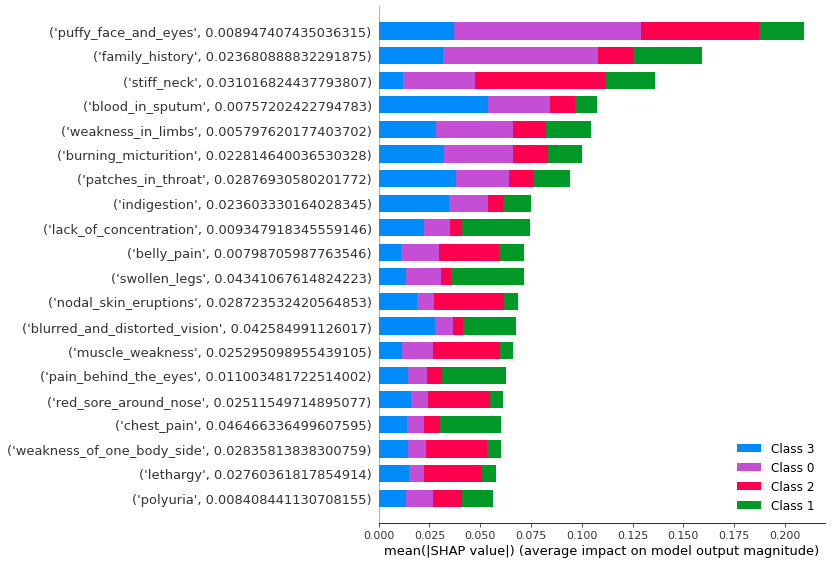

In [81]:
shap.summary_plot(shap_values, X_test, features)

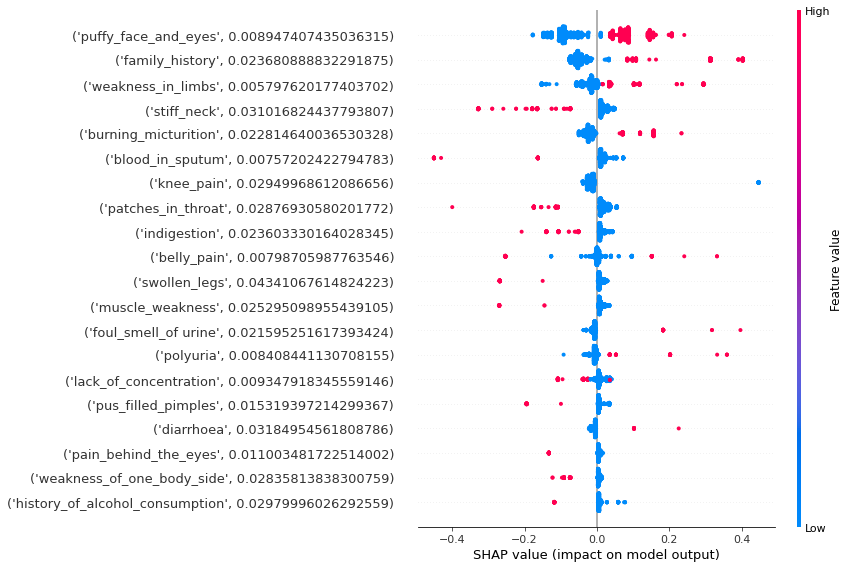

In [82]:
shap.summary_plot(shap_values[0], X_test, features)

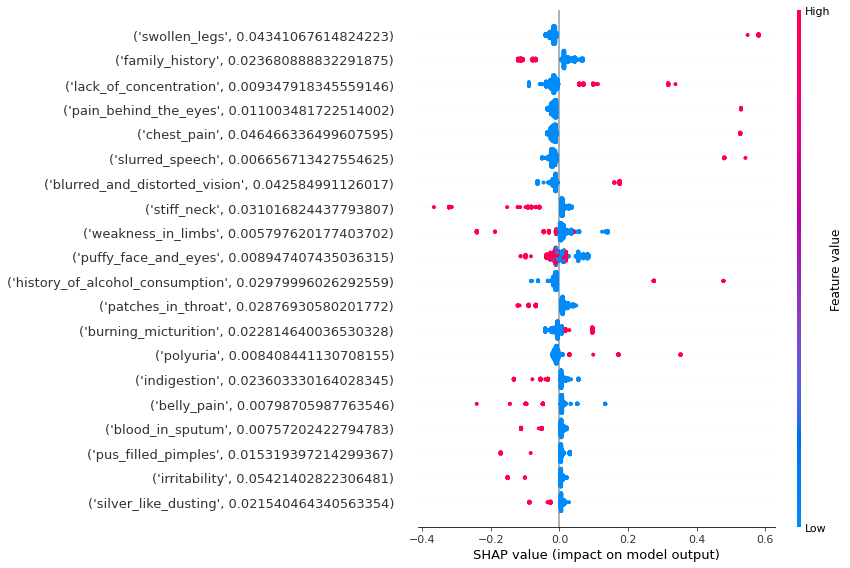

In [83]:
shap.summary_plot(shap_values[1], X_test, features)

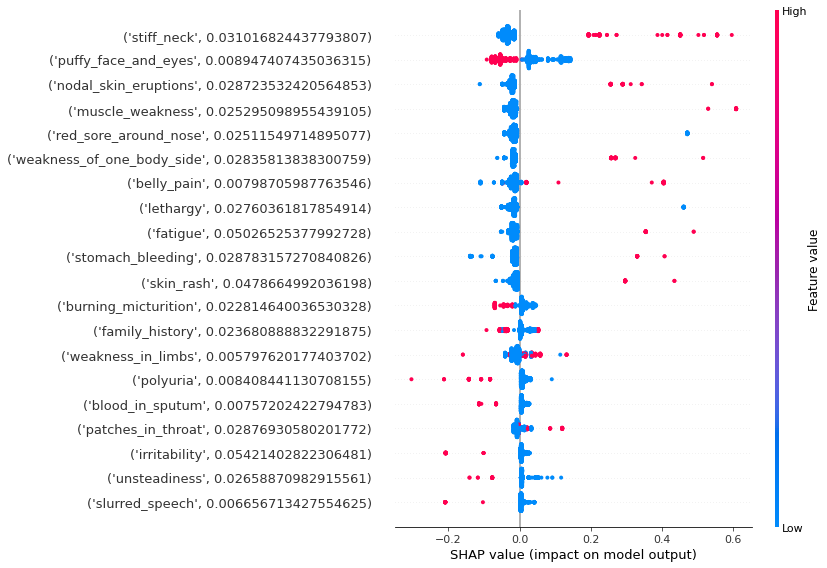

In [84]:
shap.summary_plot(shap_values[2], X_test, features)

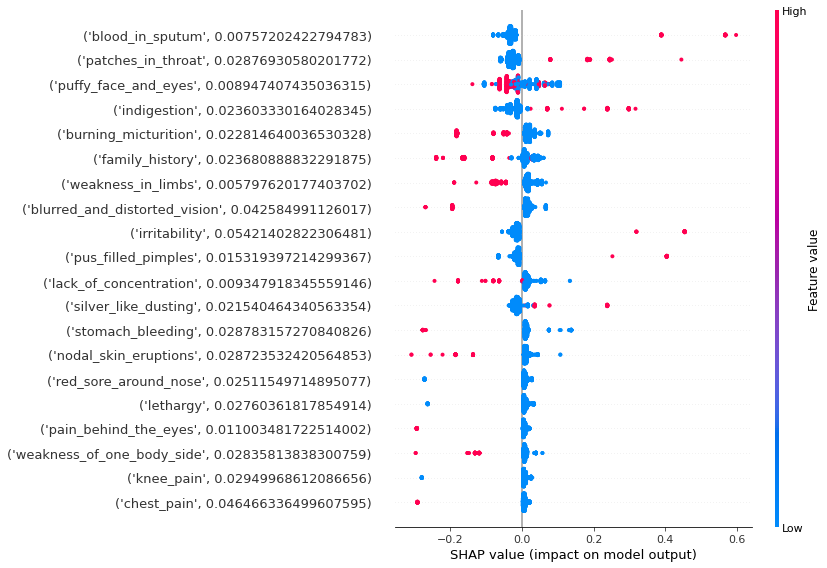

In [85]:
shap.summary_plot(shap_values[3], X_test, features)

# Assessing Feature importance by recursively dropping features 

In [86]:
#determining feature importances
from sklearn.base import clone

X_train = pd.DataFrame(X_train)

model_clone = clone(classifier)
model_clone.random_state = 42
model_clone.fit(X_train, y_train)
benchmark_score = model_clone.score(X_train, y_train)
importances = []

for col in X_train.columns:
    model_clone = clone(classifier)
    model_clone.random_state = 42
    model_clone.fit(X_train.drop(col, axis = 1), y_train)
    drop_col_score = model_clone.score(X_train.drop(col, axis = 1), y_train)
    importances.append(benchmark_score - drop_col_score)
    
for (a,b) in zip(disease_clean.columns, importances):
    print(a ,"; Importance: ", b)

skin_rash ; Importance:  0.028709349593495914
nodal_skin_eruptions ; Importance:  0.004065040650406471
continuous_sneezing ; Importance:  0.022357723577235755
stomach_pain ; Importance:  0.027693089430894324
burning_micturition ; Importance:  0.006351626016260159
fatigue ; Importance:  0.0022865853658536883
lethargy ; Importance:  0.024390243902439046
patches_in_throat ; Importance:  0.02083333333333337
dehydration ; Importance:  0.019308943089430874
indigestion ; Importance:  0.0
pain_behind_the_eyes ; Importance:  0.0022865853658536883
diarrhoea ; Importance:  0.020325203252032575
blurred_and_distorted_vision ; Importance:  0.0
chest_pain ; Importance:  0.026930894308943132
weakness_in_limbs ; Importance:  0.0
pain_during_bowel_movements ; Importance:  0.02184959349593496
swollen_legs ; Importance:  0.02388211382113825
puffy_face_and_eyes ; Importance:  0.0
slurred_speech ; Importance:  0.0
knee_pain ; Importance:  0.023628048780487854
muscle_weakness ; Importance:  0.001016260162601

In [87]:
disease_clean_2 = disease_clean.drop(['muscle_weakness'], axis =1)

In [88]:
disease_clean_2

,skin_rash,nodal_skin_eruptions,continuous_sneezing,stomach_pain,burning_micturition,fatigue,lethargy,patches_in_throat,dehydration,indigestion,pain_behind_the_eyes,diarrhoea,blurred_and_distorted_vision,chest_pain,weakness_in_limbs,pain_during_bowel_movements,swollen_legs,puffy_face_and_eyes,slurred_speech,knee_pain,stiff_neck,loss_of_balance,unsteadiness,weakness_of_one_body_side,foul_smell_of urine,irritability,belly_pain,polyuria,family_history,lack_of_concentration,stomach_bleeding,history_of_alcohol_consumption,blood_in_sputum,pus_filled_pimples,silver_like_dusting,red_sore_around_nose,diagnosis,triage
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,3
4916,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Acne,3
4917,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Urinary tract infection,2
4918,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Psoriasis,3


In [89]:
#Split data for random forests
y2 = disease_clean_2['triage']
X2 = disease_clean_2.drop(['triage','diagnosis'], axis =1)

In [90]:
#split data intro train, test data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [91]:
#Scale data
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

In [92]:
classifier2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier2.fit(X_train2, y_train2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [93]:
# Predicting the Test set results
y_pred2 = classifier2.predict(X_test2)
# Making the Confusion Matrix
print(pd.crosstab(y_test2, y_pred2, rownames=['Acutal Triage'], colnames=['Predicted Triage']))

Predicted Triage    1    2    3    4
Acutal Triage                       
1                 209   25    0   34
2                  34  170    2   10
3                   2    0  248    8
4                   2    0    0  240


In [94]:
predicted_train2 = classifier2.predict(X_train2)
accuracy_score(y_train2, predicted_train2)

0.9047256097560976

In [95]:
predicted_test2 = classifier2.predict(X_test2)
accuracy_score(y_test2, predicted_test2)

0.8810975609756098

In [96]:
print(classification_report(y_test2,y_pred2))

              precision    recall  f1-score   support

           1       0.85      0.78      0.81       268
           2       0.87      0.79      0.83       216
           3       0.99      0.96      0.98       258
           4       0.82      0.99      0.90       242

    accuracy                           0.88       984
   macro avg       0.88      0.88      0.88       984
weighted avg       0.88      0.88      0.88       984



In [97]:
#determining feature importances
from sklearn.base import clone

X_train2 = pd.DataFrame(X_train2)

model_clone = clone(classifier2)
model_clone.random_state = 42
model_clone.fit(X_train2, y_train2)
benchmark_score = model_clone.score(X_train2, y_train2)
importances = []

for col in X_train2.columns:
    model_clone = clone(classifier2)
    model_clone.random_state = 42
    model_clone.fit(X_train2.drop(col, axis = 1), y_train2)
    drop_col_score = model_clone.score(X_train2.drop(col, axis = 1), y_train2)
    importances.append(benchmark_score - drop_col_score)
    
for (a,b) in zip(disease_clean_2.columns, importances):
    print("Feature:", a ,"; Importance: ", b)

Feature: skin_rash ; Importance:  0.028709349593496025
Feature: nodal_skin_eruptions ; Importance:  0.004065040650406582
Feature: continuous_sneezing ; Importance:  0.022357723577235866
Feature: stomach_pain ; Importance:  0.027693089430894324
Feature: burning_micturition ; Importance:  0.00635162601626027
Feature: fatigue ; Importance:  0.0022865853658536883
Feature: lethargy ; Importance:  0.024390243902439046
Feature: patches_in_throat ; Importance:  0.02083333333333337
Feature: dehydration ; Importance:  0.019308943089430985
Feature: indigestion ; Importance:  0.0
Feature: pain_behind_the_eyes ; Importance:  0.0022865853658536883
Feature: diarrhoea ; Importance:  0.020325203252032575
Feature: blurred_and_distorted_vision ; Importance:  0.0
Feature: chest_pain ; Importance:  0.026930894308943132
Feature: weakness_in_limbs ; Importance:  0.0
Feature: pain_during_bowel_movements ; Importance:  0.02184959349593496
Feature: swollen_legs ; Importance:  0.02388211382113825
Feature: puffy_

In [98]:
explainer = shap.TreeExplainer(classifier2)
shap_values = explainer.shap_values(X_test2, check_additivity=False)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


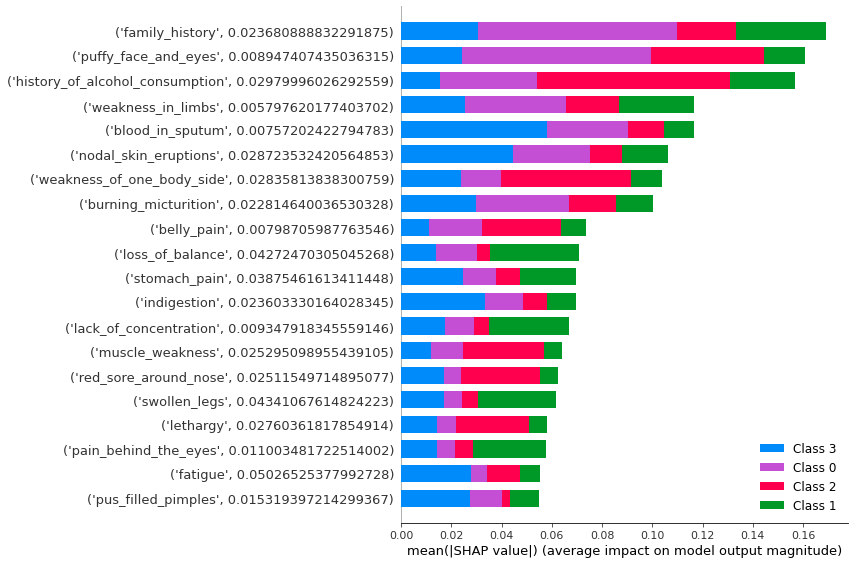

In [99]:
shap.summary_plot(shap_values, X_test2, features)

Since there is disagreement between SHAP and recursively dropping features to assess importance, and attempting to drop further features does not provide a benefit. We will stop tuning the model here. Overall the ability to classify the level of triage required for 41 distinct diseases from 36 self-diagnosable symptoms with 89% is signficiant first step towards developing a model that can be used to help patients to conduct self-triage when deciding to how quickly to seek medical care for their conditions. 

# Final Model Results

In [100]:
disease_clean.head()

,skin_rash,nodal_skin_eruptions,continuous_sneezing,stomach_pain,burning_micturition,fatigue,lethargy,patches_in_throat,dehydration,indigestion,pain_behind_the_eyes,diarrhoea,blurred_and_distorted_vision,chest_pain,weakness_in_limbs,pain_during_bowel_movements,swollen_legs,puffy_face_and_eyes,slurred_speech,knee_pain,muscle_weakness,stiff_neck,loss_of_balance,unsteadiness,weakness_of_one_body_side,foul_smell_of urine,irritability,belly_pain,polyuria,family_history,lack_of_concentration,stomach_bleeding,history_of_alcohol_consumption,blood_in_sputum,pus_filled_pimples,silver_like_dusting,red_sore_around_nose,diagnosis,triage
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2


In [101]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Acutal Triage'], colnames=['Predicted Triage']))

Predicted Triage    1    2    3    4
Acutal Triage                       
1                 209   25    0   34
2                  34  170    2   10
3                   2    0  250    6
4                   2    0    0  240


In [102]:
predicted_train = classifier.predict(X_train)
accuracy_score(y_train, predicted_train)

0.9057418699186992

In [103]:
predicted_test = classifier.predict(X_test)
accuracy_score(y_test, predicted_test)

0.883130081300813

In [104]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.85      0.78      0.81       268
           2       0.87      0.79      0.83       216
           3       0.99      0.97      0.98       258
           4       0.83      0.99      0.90       242

    accuracy                           0.88       984
   macro avg       0.88      0.88      0.88       984
weighted avg       0.89      0.88      0.88       984



Confusion matrix, without normalization
[[209  25   0  34]
 [ 34 170   2  10]
 [  2   0 250   6]
 [  2   0   0 240]]
Normalized confusion matrix
[[0.77985075 0.09328358 0.         0.12686567]
 [0.15740741 0.78703704 0.00925926 0.0462963 ]
 [0.00775194 0.         0.96899225 0.02325581]
 [0.00826446 0.         0.         0.99173554]]


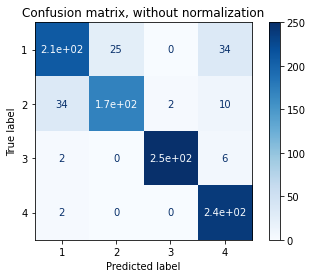

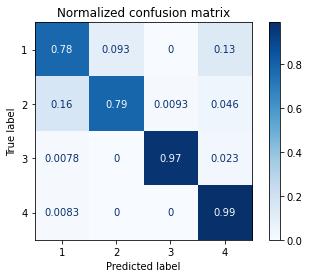

In [105]:
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()